## Data Visualization with R

Here, I have tried to include most of the visualizations which are useful in data analysis.

### Loading libraries

In [2]:
#Loading some libraries
library(readr)
library(ggplot2)
library(dplyr)
library(yarrr)
library(e1071)
library(caret)
library(corrgram)
library(usmap)
library(maps)
library(mapdata)
library(ggmap)
library(tmap)
library(sp)
library(leaflet)
library(tidyverse)
library(ggfittext)
library(treemapify)
library(ggridges)
library(ggcorrplot)
library(vcd)
library(scales)
library(rmarkdown)
library(rgdal)

### Importing data

In [3]:
# Importing data
df = read.csv('raw_automobile_data.csv')
# getting only 5 rows
head(df, 5)

symboling normalized_losses make        fuel_type aspiration num_of_doors
1 3          NA               alfa-romero gas       std        two         
2 3          NA               alfa-romero gas       std        two         
3 1          NA               alfa-romero gas       std        two         
4 2         164               audi        gas       std        four        
5 2         164               audi        gas       std        four        
  body_style  drive_wheels engine_location wheel_base ... engine_size
1 convertible rwd          front           88.6       ... 130        
2 convertible rwd          front           88.6       ... 130        
3 hatchback   rwd          front           94.5       ... 152        
4 sedan       fwd          front           99.8       ... 109        
5 sedan       4wd          front           99.4       ... 136        
  fuel_system bore stroke compression_ratio horsepower peak_rpm city_mpg
1 mpfi        3.47 2.68    9                111        5000     21      
2 mpfi        3.47 2.68    9                111        5000     21      
3 mpfi        2.68 3.47    9                154        5000     19      
4 mpfi        3.19 3.40   10                102        5500     24      
5 mpfi        3.19 3.40    8                115        5500     18      
  highway_mpg price
1 27          13495
2 27          16500
3 26          16500
4 30          13950
5 22          17450

In [4]:
#Getting total missing values in each column
colSums(is.na(df))

symboling normalized_losses              make         fuel_type 
                0                41                 0                 0 
       aspiration      num_of_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type  num_of_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 4                 4 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 2                 2                 0 
      highway_mpg             price 
                0                 4

### Replacing the missing Values

In [5]:
#Replacing normalized_locess by mean
df$normalized_losses[is.na(df$normalized_losses)] <- mean(df$normalized_losses, na.rm = TRUE)

In [6]:
#Replacing stroke by mean
df$stroke[is.na(df$stroke)] <- mean(df$stroke, na.rm = TRUE)

In [7]:
#Replacing bore by mean
df$bore[is.na(df$bore)] <- mean(df$bore, na.rm = TRUE)

In [8]:
#Replacing horsepower by mean
df$horsepower[is.na(df$horsepower)] <- mean(df$horsepower, na.rm = TRUE)

In [9]:
#Replacing peak_rpm by mean
df$peak_rpm[is.na(df$peak_rpm)] <- mean(df$peak_rpm, na.rm = TRUE)

In [10]:
#Replacing peak_rpm by Mode
df$num_of_doors[is.na(df$num_of_doors)] <- 'four'

In [11]:
#Deleting missing values in Price
df <- na.omit(df)

In [12]:
head(df)

symboling normalized_losses make        fuel_type aspiration num_of_doors
1 3         122               alfa-romero gas       std        two         
2 3         122               alfa-romero gas       std        two         
3 1         122               alfa-romero gas       std        two         
4 2         164               audi        gas       std        four        
5 2         164               audi        gas       std        four        
6 2         122               audi        gas       std        two         
  body_style  drive_wheels engine_location wheel_base ... engine_size
1 convertible rwd          front           88.6       ... 130        
2 convertible rwd          front           88.6       ... 130        
3 hatchback   rwd          front           94.5       ... 152        
4 sedan       fwd          front           99.8       ... 109        
5 sedan       4wd          front           99.4       ... 136        
6 sedan       fwd          front           99.8       ... 136        
  fuel_system bore stroke compression_ratio horsepower peak_rpm city_mpg
1 mpfi        3.47 2.68    9.0              111        5000     21      
2 mpfi        3.47 2.68    9.0              111        5000     21      
3 mpfi        2.68 3.47    9.0              154        5000     19      
4 mpfi        3.19 3.40   10.0              102        5500     24      
5 mpfi        3.19 3.40    8.0              115        5500     18      
6 mpfi        3.19 3.40    8.5              110        5500     19      
  highway_mpg price
1 27          13495
2 27          16500
3 26          16500
4 30          13950
5 22          17450
6 25          15250

In [13]:
#Getting structure of data frame - name, type and preview of data in each column
str(df)

'data.frame':	201 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized_losses: num  122 122 122 164 164 122 158 122 158 192 ...
 $ make             : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel_type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num_of_doors     : Factor w/ 3 levels "","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ body_style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive_wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine_location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel_base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54

In [14]:
# Summary statistics of all varibles in the data frame
summary(df)

   symboling       normalized_losses         make     fuel_type   aspiration 
 Min.   :-2.0000   Min.   : 65       toyota    :32   diesel: 20   std  :165  
 1st Qu.: 0.0000   1st Qu.:101       nissan    :18   gas   :181   turbo: 36  
 Median : 1.0000   Median :122       mazda     :17                           
 Mean   : 0.8408   Mean   :122       honda     :13                           
 3rd Qu.: 2.0000   3rd Qu.:137       mitsubishi:13                           
 Max.   : 3.0000   Max.   :256       subaru    :12                           
                                     (Other)   :96                           
 num_of_doors       body_style drive_wheels engine_location   wheel_base   
     :  2     convertible: 6   4wd:  8      front:198       Min.   : 86.6  
 four:113     hardtop    : 8   fwd:118      rear :  3       1st Qu.: 94.5  
 two : 86     hatchback  :68   rwd: 75                      Median : 97.0  
              sedan      :94                                Mean   : 98.

### Univariate Plots
#### Points and Lines Plot

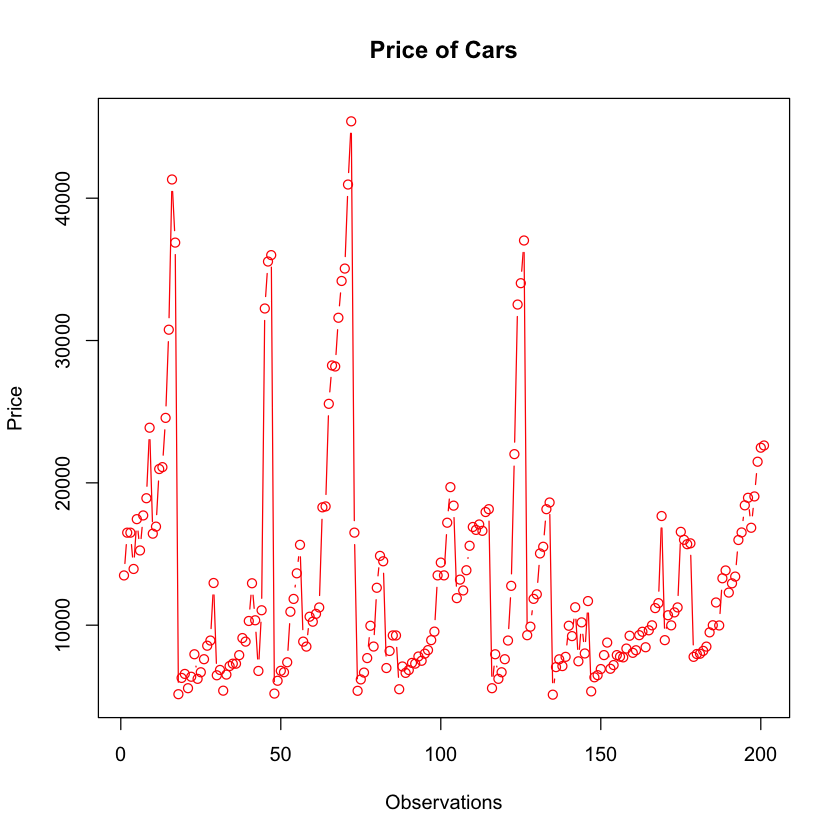

In [15]:
# Points and lines plot
 plot(df$price, type= "b", 
      main = "Price of Cars", xlab ='Observations', ylab = 'Price', col = 'red')

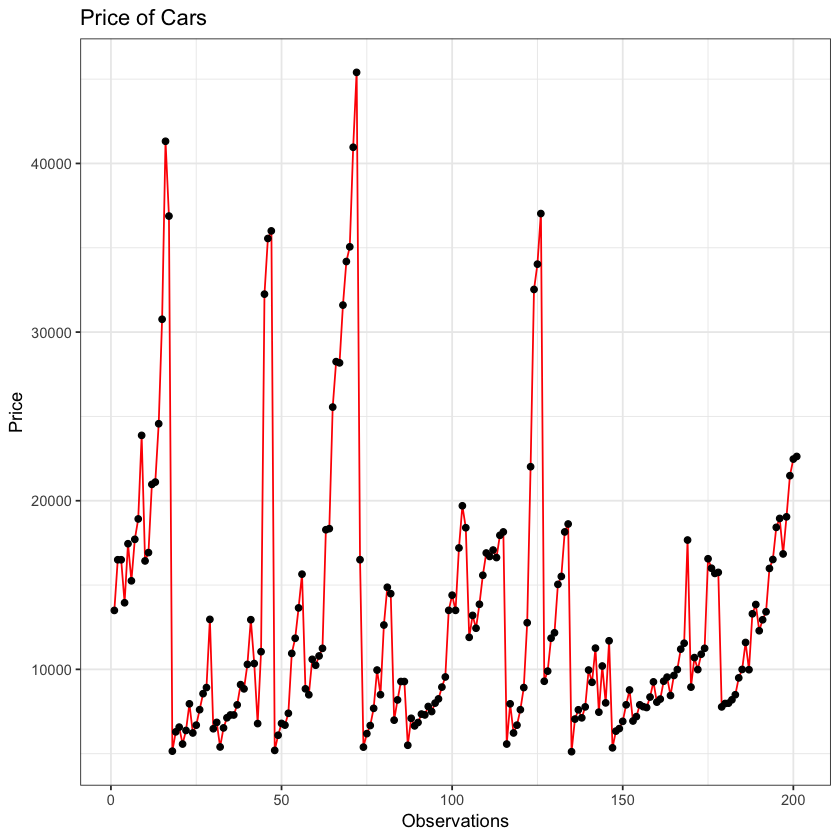

In [16]:
# Point Lines plot
ggplot(df, aes(x = 1:201, y=price)) +  geom_line(color = 'red') + 
       geom_point()+
       theme_bw()+
       labs(x = 'Observations', y = 'Price', title = 'Price of Cars' )

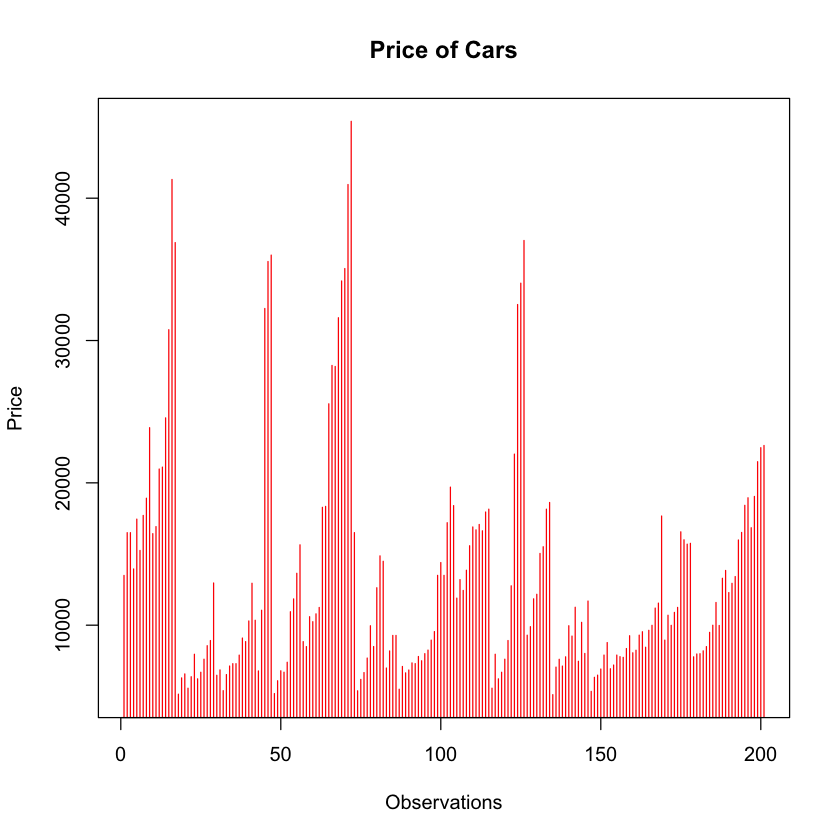

In [17]:
# Line Plot
plot(df$price, type = 'h', 
     main = "Price of Cars", xlab ='Observations', ylab = 'Price', col = 'red')

#### Histogram

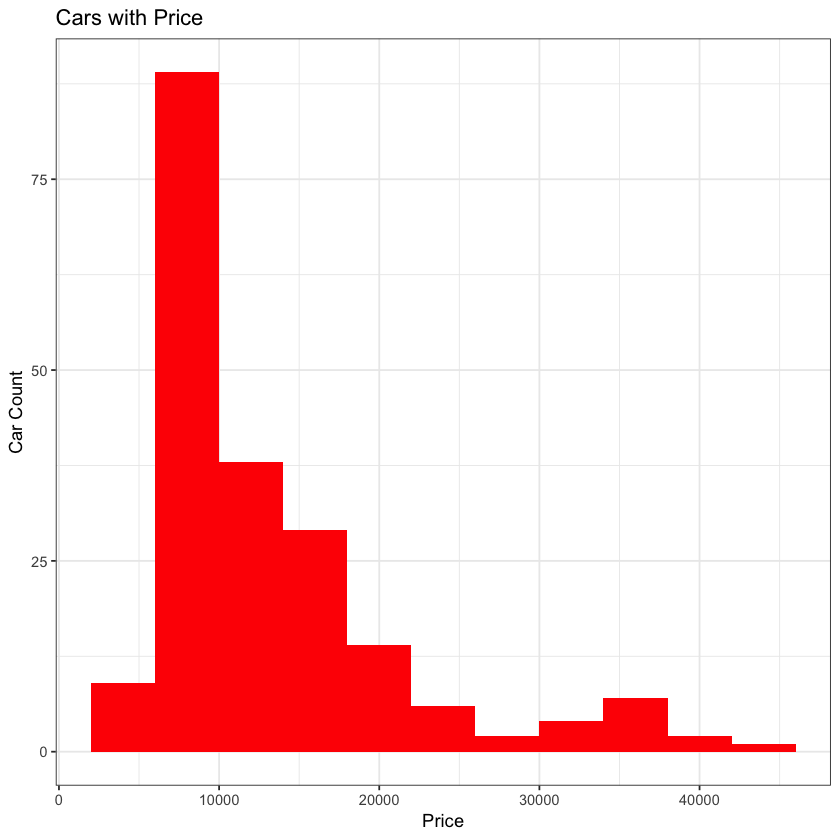

In [18]:
# Simple HISTOGRAM
ggplot(df, aes(x = price)) +  geom_histogram(fill = 'red', binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )

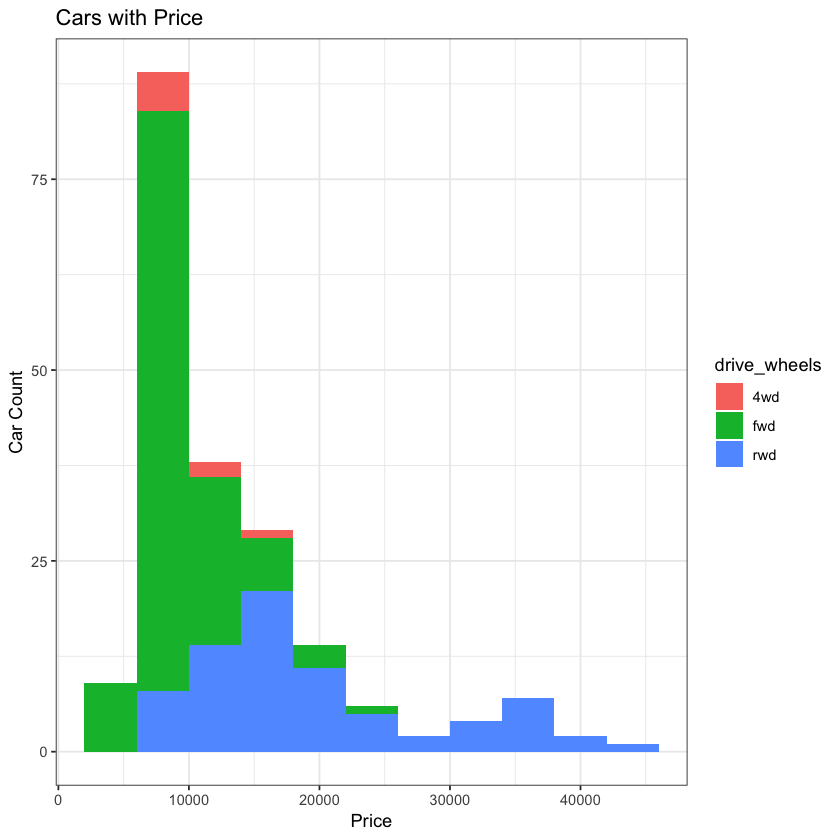

In [19]:
# HISTOGRAM with Category
ggplot(df, aes(x = price, fill= drive_wheels)) +  geom_histogram(binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )

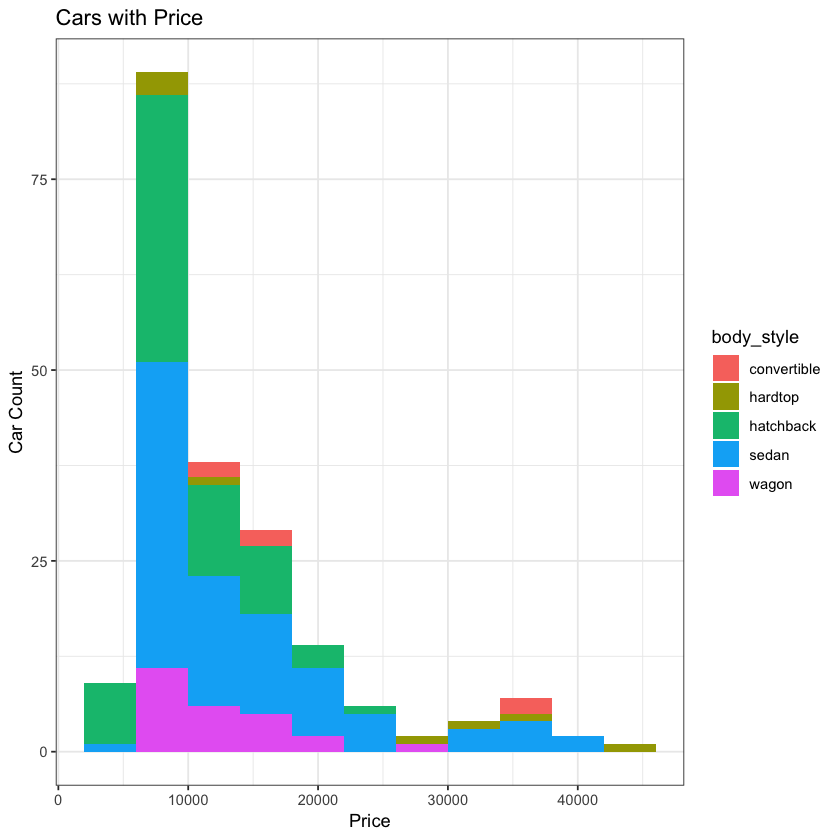

In [20]:
#HISTOGRAM with Category
ggplot(df, aes(x = price, fill= body_style)) +  geom_histogram(binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )

#### Dot Plot

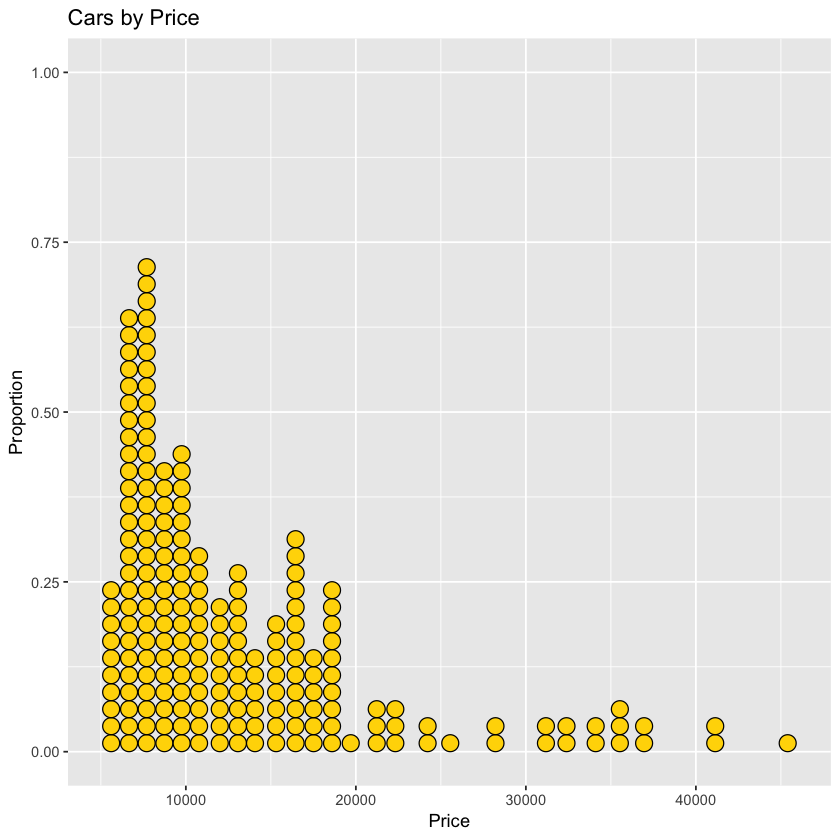

In [21]:
# Dot plot
ggplot(df, aes(x = price)) +
       geom_dotplot(fill = "gold", color = "black", binwidth = 1000) + 
       labs(title = "Cars by Price", y = "Proportion", x = "Price")

#### Density Plot

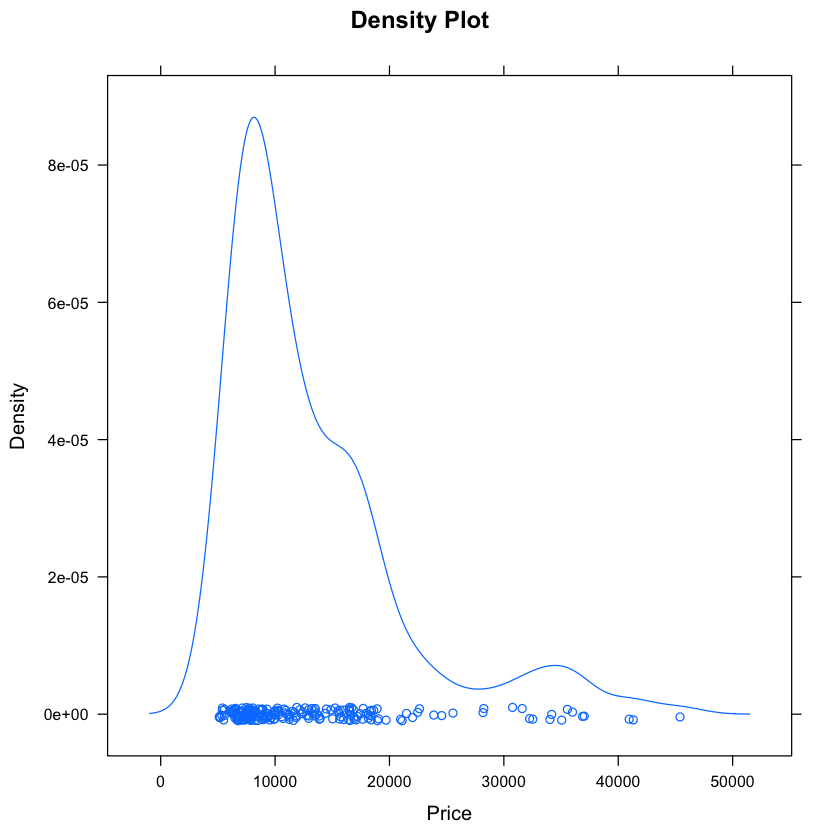

In [22]:
# Density plot
densityplot(~df$price, main="Density Plot",  xlab="Price")

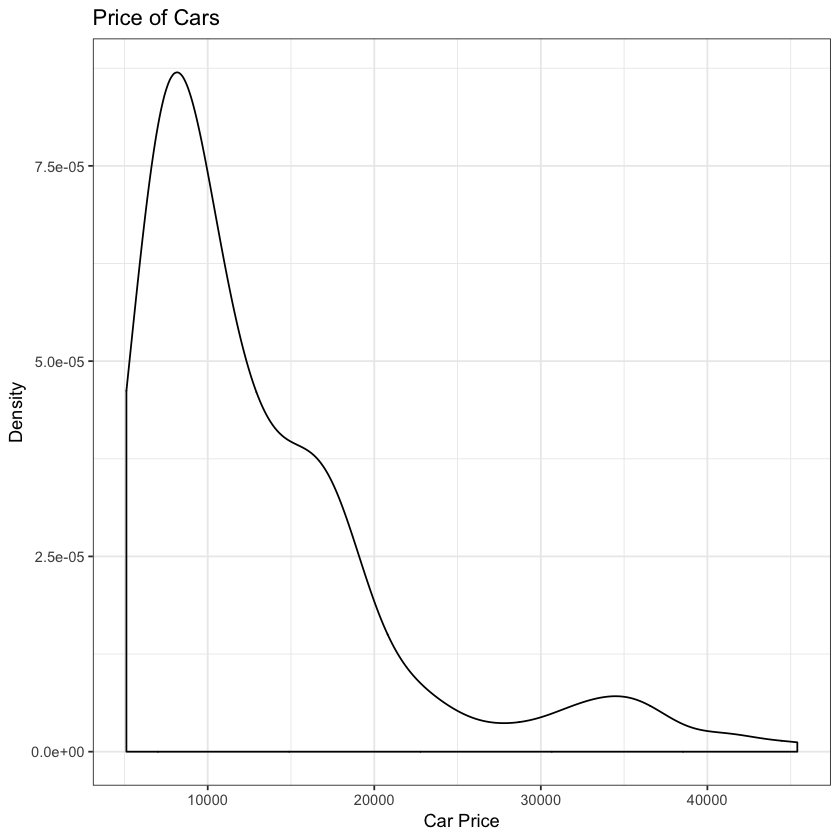

In [23]:
# Density plot
ggplot(df, aes(x = price)) +  geom_density() + 
       theme_bw()+
       labs(x = 'Car Price', y = 'Density', title = 'Price of Cars' )

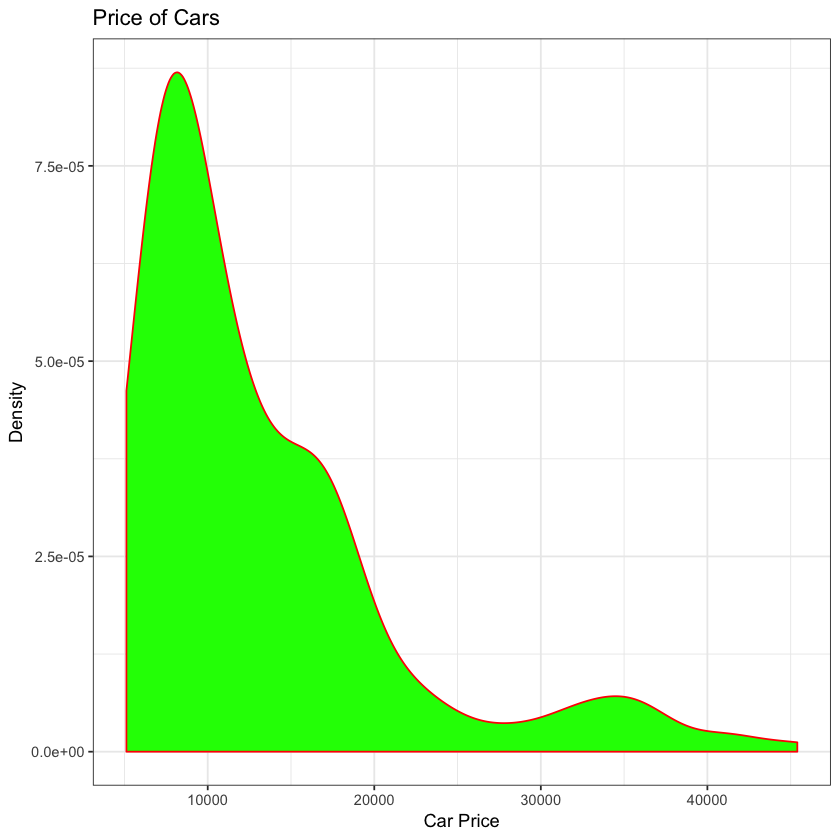

In [24]:
# Density plot
ggplot(df, aes(x = price)) +  geom_density(color = 'red', fill = 'green') + 
       theme_bw()+
       labs(x = 'Car Price', y = 'Density', title = 'Price of Cars' )

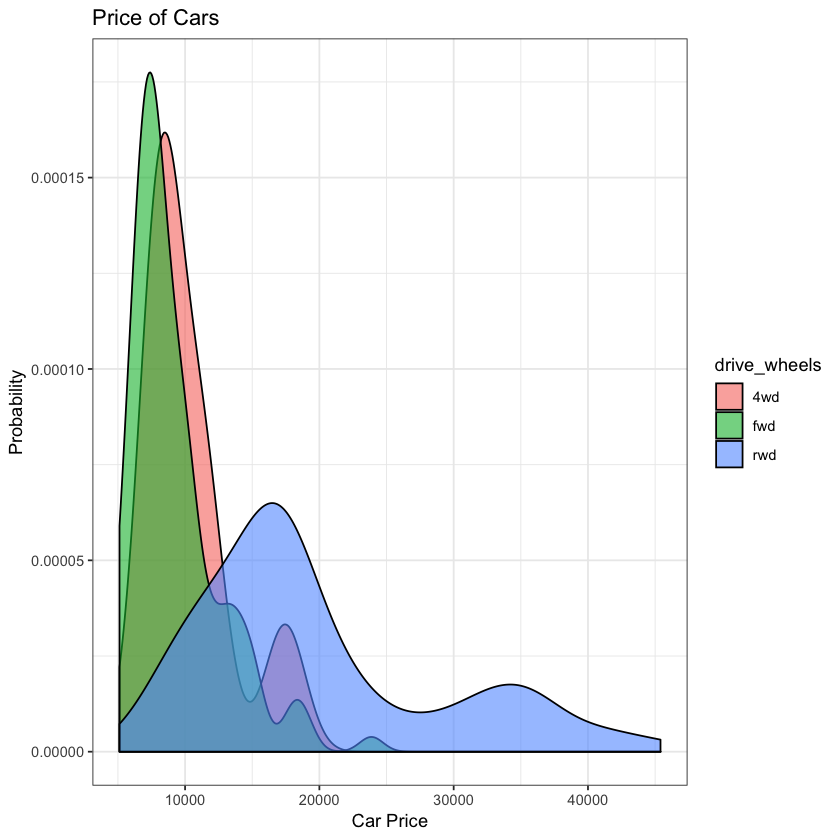

In [25]:
# Density plot fill by another categorical variable
ggplot(df, aes(x = price, fill = drive_wheels)) +  geom_density(alpha = 0.6) + 
       theme_bw()+
       labs(x = 'Car Price', y = 'Probability', title = 'Price of Cars' )

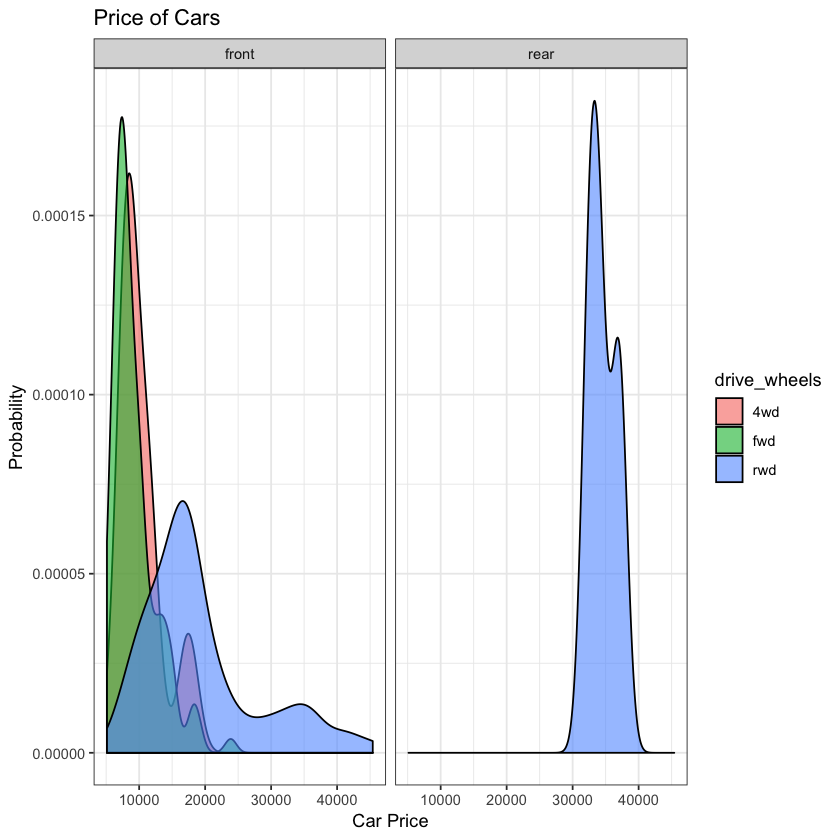

In [26]:
# Density plot fill by another categorical variable
ggplot(df, aes(x = price, fill = drive_wheels)) +  geom_density(alpha = 0.6) + 
       theme_bw()+
       facet_wrap(~engine_location)+
       labs(x = 'Car Price', y = 'Probability', title = 'Price of Cars' )

#### Bar Plot

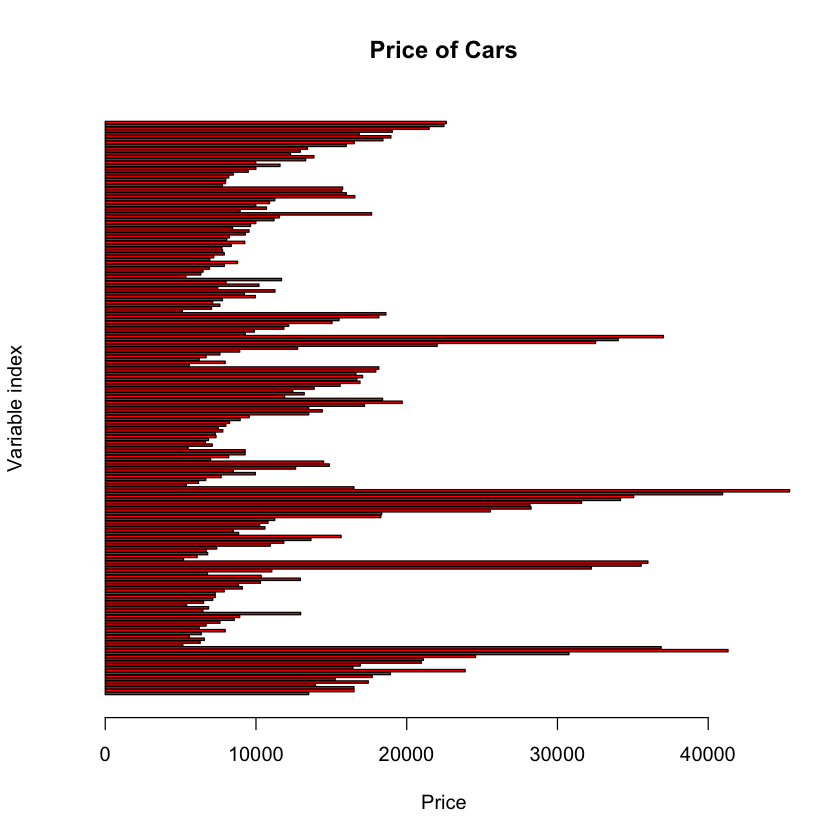

In [27]:
# Simple Bar plot
barplot(df$price, ylab = 'Variable index', xlab = 'Price',
    main = 'Price of Cars', col = 'red', horiz = TRUE)

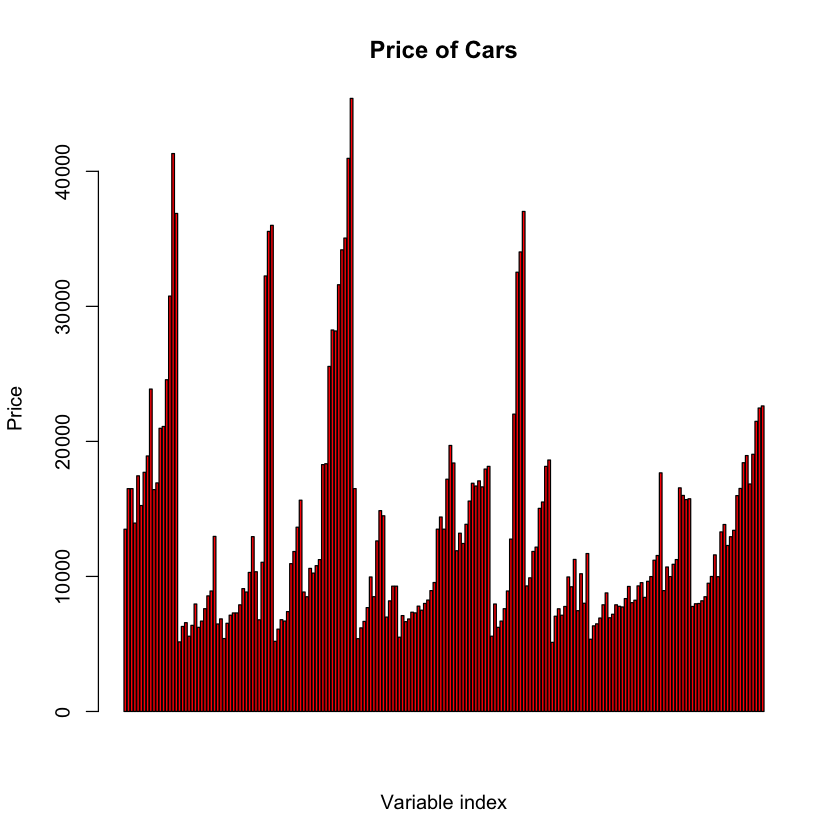

In [28]:
# Bar plot
barplot(df$price, xlab = 'Variable index', ylab = 'Price',
    main = 'Price of Cars', col = 'red', horiz = FALSE)

In [29]:
#Creating a frequency table using count function in dplyr
ftable = count(df, body_style)
ftable

body_style  n 
1 convertible  6
2 hardtop      8
3 hatchback   68
4 sedan       94
5 wagon       25

In [30]:
dim(ftable)

[1] 5 2

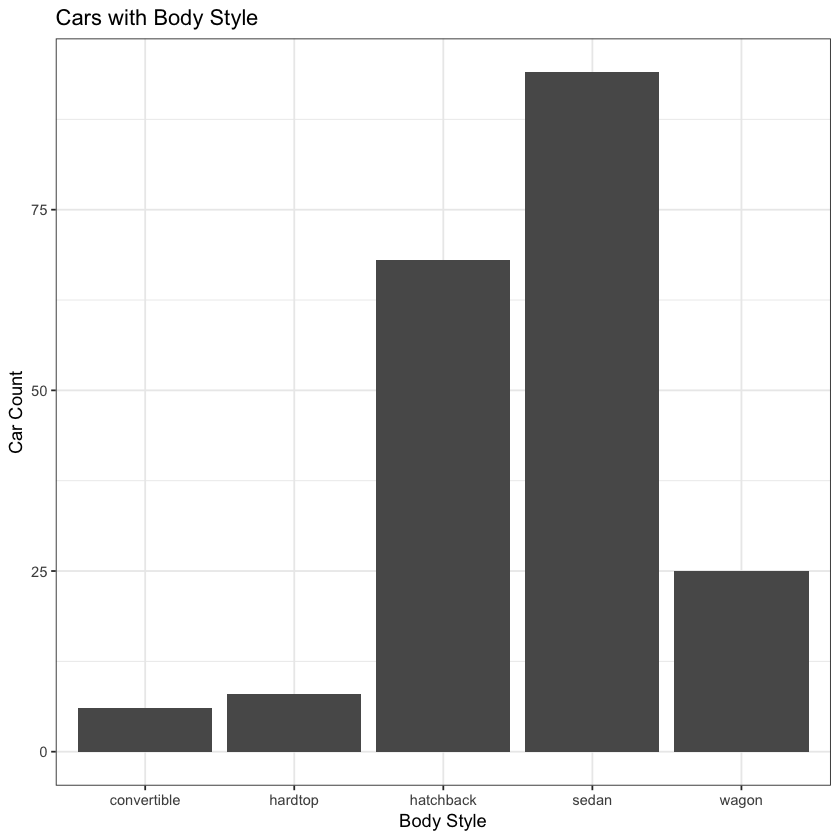

In [31]:
# Bar plot
ggplot(df, aes(x = body_style)) +  geom_bar() + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

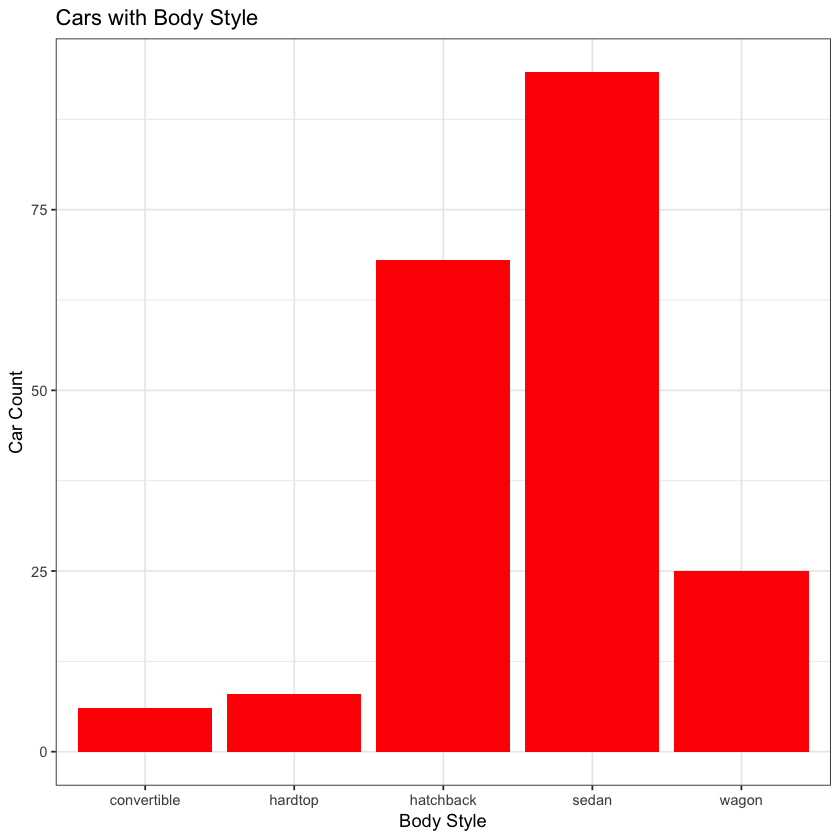

In [32]:
# Bar plot
ggplot(df, aes(x = body_style)) +  geom_bar(fill = 'red') + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

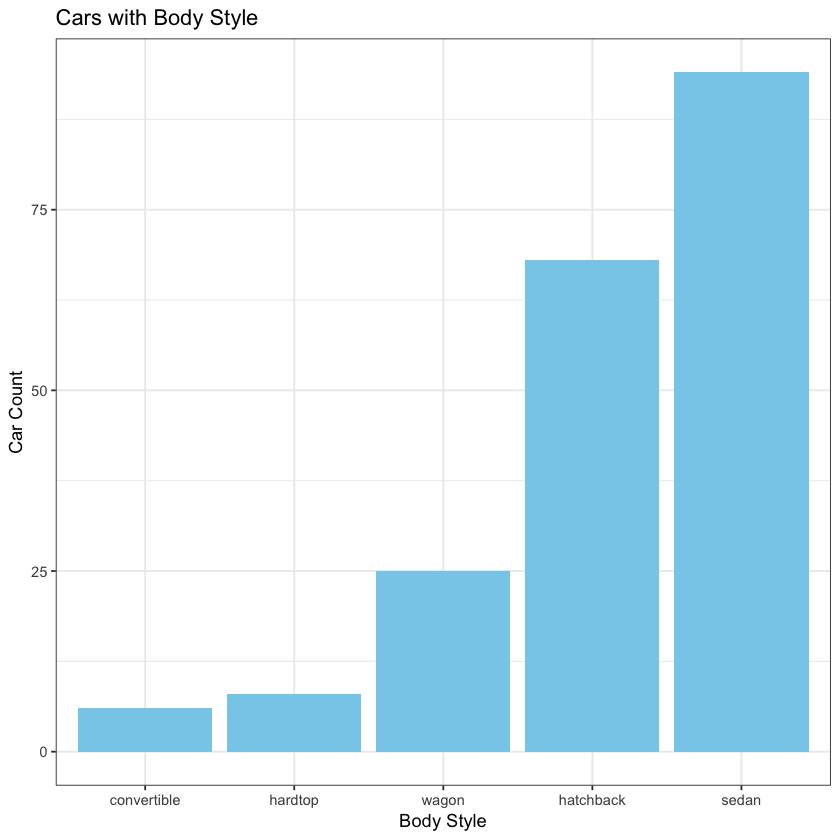

In [33]:
# plot the bars in ascending order
ggplot(ftable, aes(x = reorder(body_style, n),  y = n)) + 
       geom_bar(stat = "identity", fill = 'skyblue') +
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

#### Stacked Bar plot

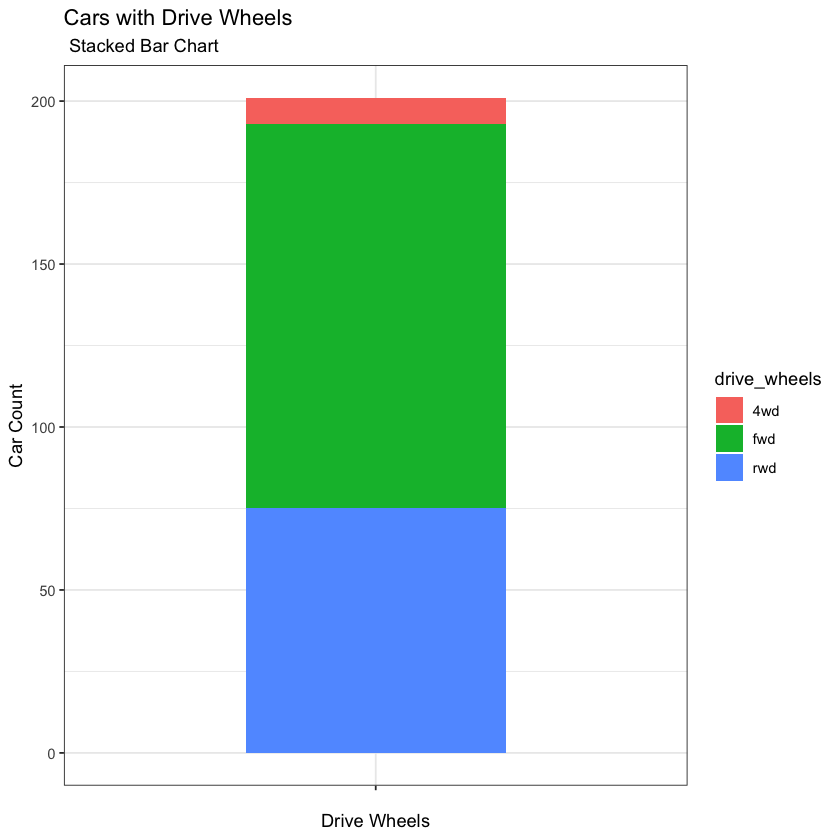

In [34]:
# Stacked Bar plot fill by another categorical variable
ggplot(df, aes(x = "", fill = drive_wheels)) +  geom_bar(width = 0.5) + 
       theme_bw()+
       labs(x = 'Drive Wheels', y = 'Car Count', 
            title = 'Cars with Drive Wheels', subtitle =' Stacked Bar Chart')

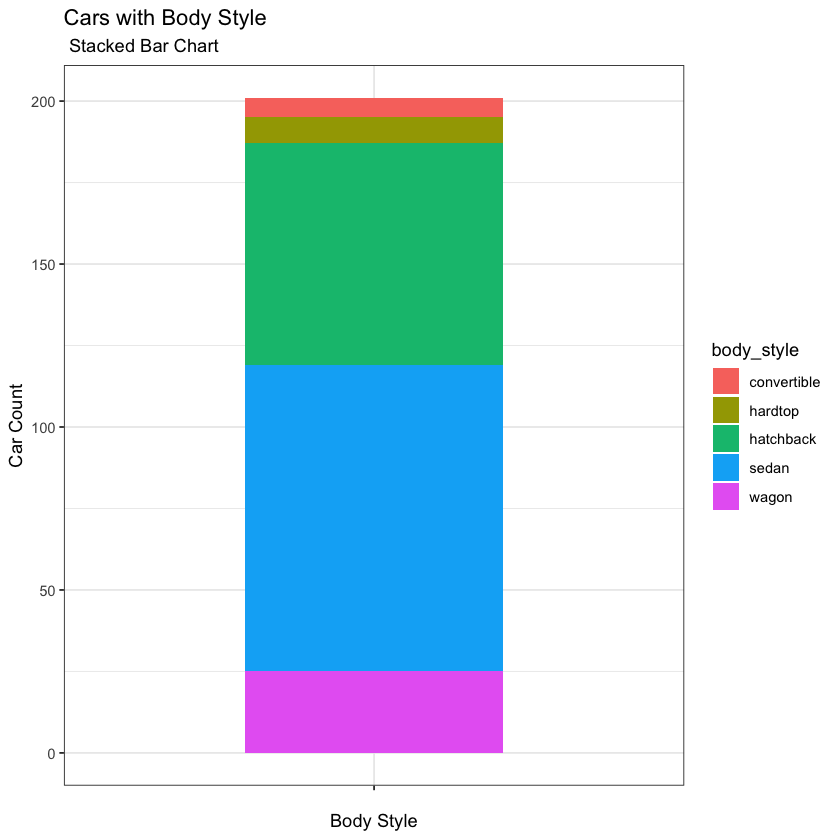

In [35]:
# Stacked Bar plot fill by another categorical variable
ggplot(df, aes(x = "", fill = body_style)) +  geom_bar(width = 0.5) + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', 
            title = 'Cars with Body Style', subtitle =' Stacked Bar Chart')

#### Pie Chart

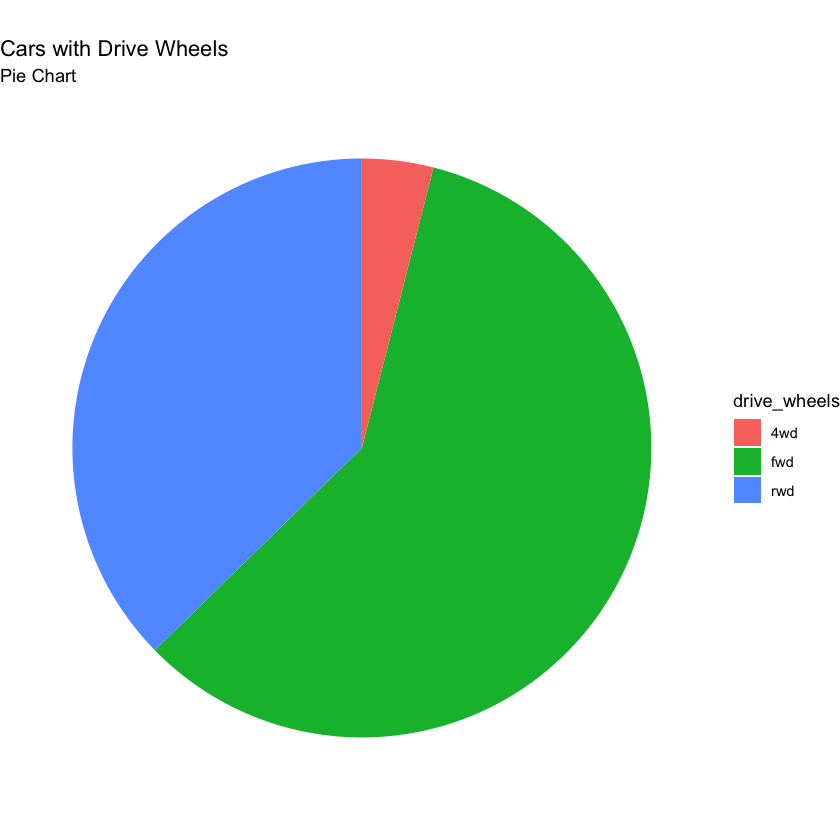

In [36]:
# Creating Pie chart
ggplot(df, aes(x=factor(3), fill= drive_wheels))+
  geom_bar()+
  coord_polar("y", start = 0,   direction = -1)+
  theme_void()+
  labs(x = '', y = '', 
       title = 'Cars with Drive Wheels', subtitle ='Pie Chart')

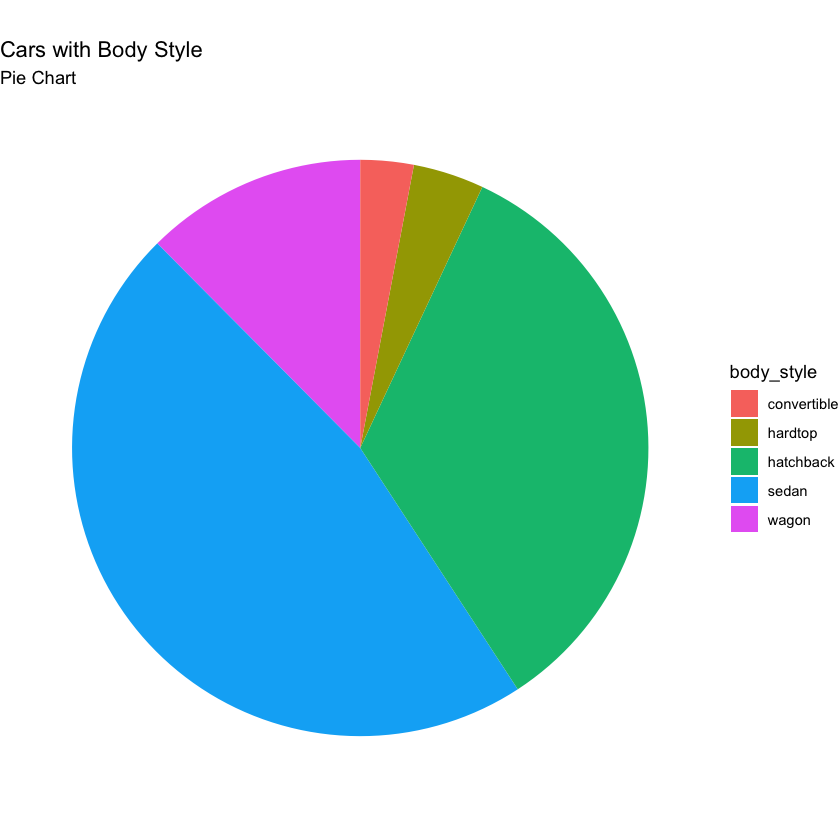

In [37]:
# Creating Pie chart as bar in polar coordinates
ggplot(df, aes(x=factor(5), fill= body_style))+
  geom_bar()+
  coord_polar("y",start = 0,   direction = -1)+
  theme_void()+
  labs(x = '', y = '', 
       title = 'Cars with Body Style', subtitle ='Pie Chart')

In [38]:
ftable

body_style  n 
1 convertible  6
2 hardtop      8
3 hatchback   68
4 sedan       94
5 wagon       25

#### Tree Map

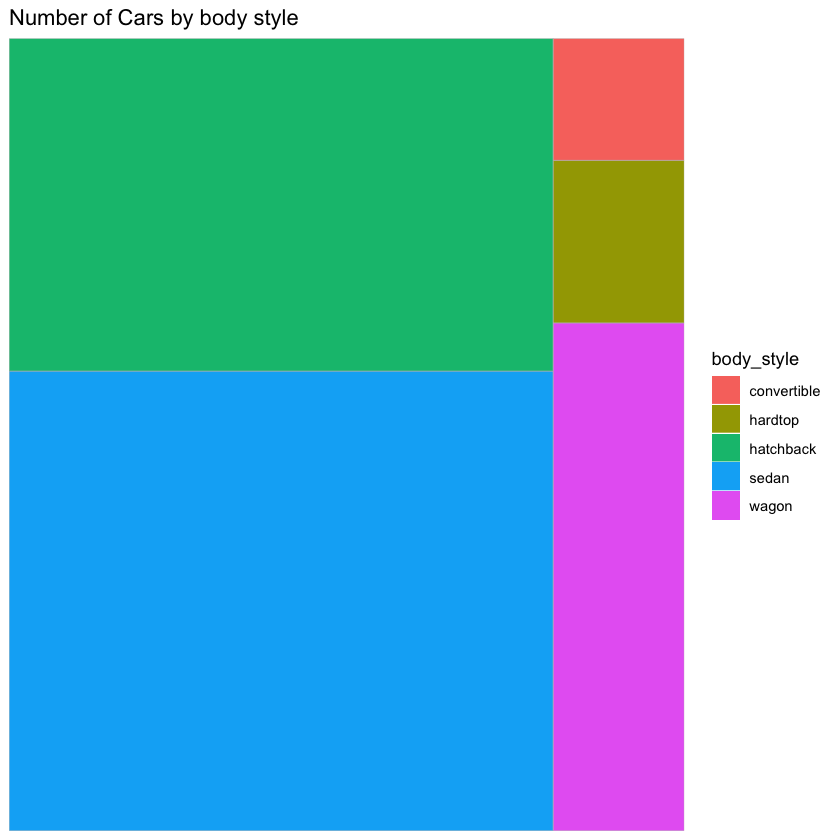

In [39]:
# create a treemap
# area = numeric , fill = categorical
ggplot(ftable, aes(area = n, fill = body_style)) +
       geom_treemap() +
       labs(title = "Number of Cars by body style") 

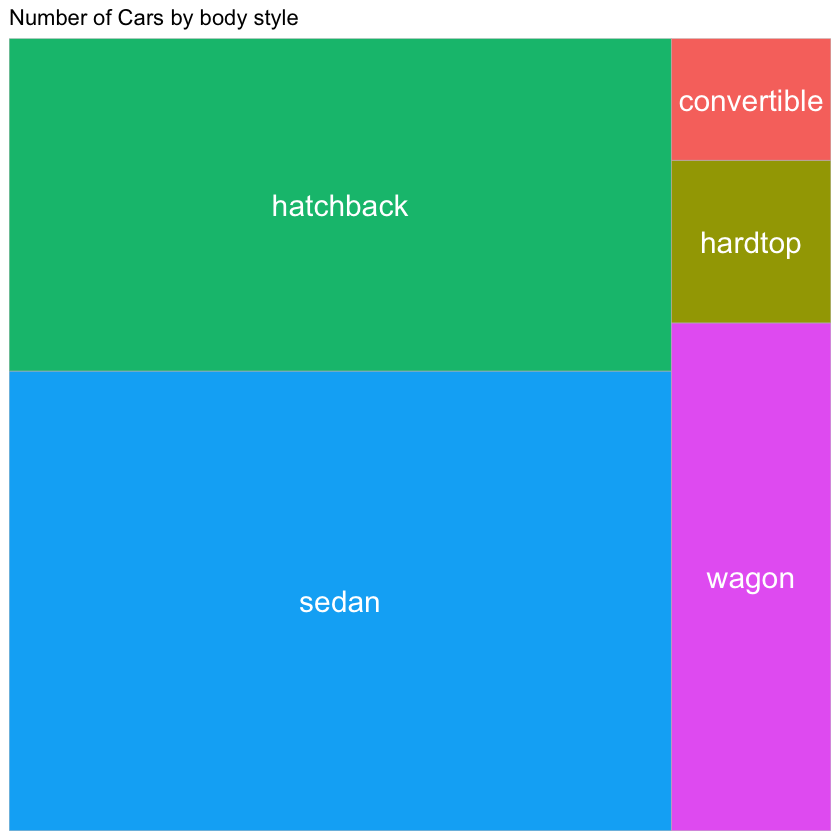

In [40]:
# create a treemap with tile labels
# area = numeric , fill = categorical
ggplot(ftable, aes(area = n, fill = body_style, label = body_style)) +
       geom_treemap() +
       geom_treemap_text(colour = "white",  place = "centre") +
       theme(legend.position = "none")+
       labs(title = "Number of Cars by body style") 

### Bivariate Graphs

In [41]:
# Normalizing columns "length", "width" and "height" using scale() function
df$length<-scale(df$length, center = TRUE, scale = TRUE)
df$width<-scale(df$width, center = TRUE, scale = TRUE)
df$height<-scale(df$height, center = TRUE, scale = TRUE)

df[1:5,]

symboling normalized_losses make        fuel_type aspiration num_of_doors
1 3         122               alfa-romero gas       std        two         
2 3         122               alfa-romero gas       std        two         
3 1         122               alfa-romero gas       std        two         
4 2         164               audi        gas       std        four        
5 2         164               audi        gas       std        four        
  body_style  drive_wheels engine_location wheel_base ... engine_size
1 convertible rwd          front           88.6       ... 130        
2 convertible rwd          front           88.6       ... 130        
3 hatchback   rwd          front           94.5       ... 152        
4 sedan       fwd          front           99.8       ... 109        
5 sedan       4wd          front           99.4       ... 136        
  fuel_system bore stroke compression_ratio horsepower peak_rpm city_mpg
1 mpfi        3.47 2.68    9                111        5000     21      
2 mpfi        3.47 2.68    9                111        5000     21      
3 mpfi        2.68 3.47    9                154        5000     19      
4 mpfi        3.19 3.40   10                102        5500     24      
5 mpfi        3.19 3.40    8                115        5500     18      
  highway_mpg price
1 27          13495
2 27          16500
3 26          16500
4 30          13950
5 22          17450

In [42]:
#Getting structure of data frame - name, type and preview of data in each column
str(df)

'data.frame':	201 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized_losses: num  122 122 122 164 164 122 158 122 158 192 ...
 $ make             : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel_type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num_of_doors     : Factor w/ 3 levels "","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ body_style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive_wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine_location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel_base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num [1:201, 1] -0.438 -0.438 -0.244 0.195 0.195 ...
  ..- attr(*, "scaled:center")= num 174
  ..- attr(*, "scaled:scale")= num 12.3
 $ width            : num [1:201, 1] -0.851 -0.851 -

In [43]:
#Correlation matrix of numeric variables
cor(df[ , c(1, 2,10,11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25, 26)])

symboling    normalized_losses wheel_base  length     
symboling          1.000000000  0.46626376       -0.53598680 -0.36540436
normalized_losses  0.466263758  1.00000000       -0.05666124  0.01942356
wheel_base        -0.535986803 -0.05666124        1.00000000  0.87602389
length            -0.365404363  0.01942356        0.87602389  1.00000000
width             -0.242422604  0.08680206        0.81450665  0.85717032
height            -0.550159864 -0.37373695        0.59074167  0.49206255
curb_weight       -0.233118485  0.09940425        0.78209724  0.88066479
engine_size       -0.110580556  0.11236002        0.57202669  0.68502476
bore              -0.140019370 -0.02986248        0.49324419  0.60897097
stroke            -0.008152842  0.05504531        0.15801767  0.12395231
compression_ratio -0.182196158 -0.11471325        0.25031309  0.15973311
horsepower         0.075818883  0.21729943        0.37114668  0.57982145
peak_rpm           0.279739659  0.23954349       -0.36030453 -0.28596960
city_mpg          -0.035527043 -0.22501573       -0.47060641 -0.66519239
highway_mpg        0.036232811 -0.18187718       -0.54330447 -0.69814185
price             -0.082391187  0.13399873        0.58464182  0.69062838
                  width       height      curb_weight engine_size bore        
symboling         -0.24242260 -0.55015986 -0.23311849 -0.11058056 -0.140019370
normalized_losses  0.08680206 -0.37373695  0.09940425  0.11236002 -0.029862483
wheel_base         0.81450665  0.59074167  0.78209724  0.57202669  0.493244186
length             0.85717032  0.49206255  0.88066479  0.68502476  0.608970970
width              1.00000000  0.30600216  0.86620110  0.72943564  0.544885463
height             0.30600216  1.00000000  0.30758082  0.07469409  0.180448742
curb_weight        0.86620110  0.30758082  1.00000000  0.84907166  0.644060479
engine_size        0.72943564  0.07469409  0.84907166  1.00000000  0.572609326
bore               0.54488546  0.18044874  0.64406048  0.57260933  1.000000000
stroke             0.18882198 -0.06066251  0.16743799  0.20592826 -0.055389663
compression_ratio  0.18986712  0.25973714  0.15643261  0.02888863  0.001263305
horsepower         0.61507674 -0.08702656  0.75797561  0.82267565  0.566935526
peak_rpm          -0.24580014 -0.30997400 -0.27936062 -0.25673297 -0.267391599
city_mpg          -0.63353064 -0.04979997 -0.74954309 -0.65054598 -0.582027050
highway_mpg       -0.68063521 -0.10481184 -0.79488894 -0.67957126 -0.591309239
price              0.75126534  0.13548631  0.83441453  0.87233517  0.543155383
                  stroke       compression_ratio horsepower  peak_rpm   
symboling         -0.008152842 -0.182196158       0.07581888  0.27973966
normalized_losses  0.055045310 -0.114713246       0.21729943  0.23954349
wheel_base         0.158017669  0.250313088       0.37114668 -0.36030453
length             0.123952309  0.159733109       0.57982145 -0.28596960
width              0.188821981  0.189867118       0.61507674 -0.24580014
height            -0.060662512  0.259737141      -0.08702656 -0.30997400
curb_weight        0.167437988  0.156432613       0.75797561 -0.27936062
engine_size        0.205928261  0.028888633       0.82267565 -0.25673297
bore              -0.055389663  0.001263305       0.56693553 -0.26739160
stroke             1.000000000  0.187871356       0.09826699 -0.06356121
compression_ratio  0.187871356  1.000000000      -0.21451414 -0.43577976
horsepower         0.098266994 -0.214514136       1.00000000  0.10788485
peak_rpm          -0.063561213 -0.435779763       0.10788485  1.00000000
city_mpg          -0.033955977  0.331424839      -0.82221433 -0.11541311
highway_mpg       -0.034635736  0.268464848      -0.80457478 -0.05859759
price              0.082269289  0.071107327       0.80957457 -0.10161587
                  city_mpg    highway_mpg price      
symboling         -0.03552704  0.03623281 -0.08239119
normalized_losses -0.22501573 -0.18187718  0.13399873
wheel_base        -0.47060641 -

In [44]:
#Highly Correlated variables with price
cor(df[ , c(10,11, 12, 14, 17, 19, 22, 24, 25, 26)])

wheel_base length     width      curb_weight engine_size bore      
wheel_base   1.0000000  0.8760239  0.8145067  0.7820972   0.5720267   0.4932442
length       0.8760239  1.0000000  0.8571703  0.8806648   0.6850248   0.6089710
width        0.8145067  0.8571703  1.0000000  0.8662011   0.7294356   0.5448855
curb_weight  0.7820972  0.8806648  0.8662011  1.0000000   0.8490717   0.6440605
engine_size  0.5720267  0.6850248  0.7294356  0.8490717   1.0000000   0.5726093
bore         0.4932442  0.6089710  0.5448855  0.6440605   0.5726093   1.0000000
horsepower   0.3711467  0.5798215  0.6150767  0.7579756   0.8226756   0.5669355
city_mpg    -0.4706064 -0.6651924 -0.6335306 -0.7495431  -0.6505460  -0.5820270
highway_mpg -0.5433045 -0.6981418 -0.6806352 -0.7948889  -0.6795713  -0.5913092
price        0.5846418  0.6906284  0.7512653  0.8344145   0.8723352   0.5431554
            horsepower city_mpg   highway_mpg price     
wheel_base   0.3711467 -0.4706064 -0.5433045   0.5846418
length       0.5798215 -0.6651924 -0.6981418   0.6906284
width        0.6150767 -0.6335306 -0.6806352   0.7512653
curb_weight  0.7579756 -0.7495431 -0.7948889   0.8344145
engine_size  0.8226756 -0.6505460 -0.6795713   0.8723352
bore         0.5669355 -0.5820270 -0.5913092   0.5431554
horsepower   1.0000000 -0.8222143 -0.8045748   0.8095746
city_mpg    -0.8222143  1.0000000  0.9720437  -0.6865710
highway_mpg -0.8045748  0.9720437  1.0000000  -0.7046923
price        0.8095746 -0.6865710 -0.7046923   1.0000000

#### Correlation matrix of scatter Plot

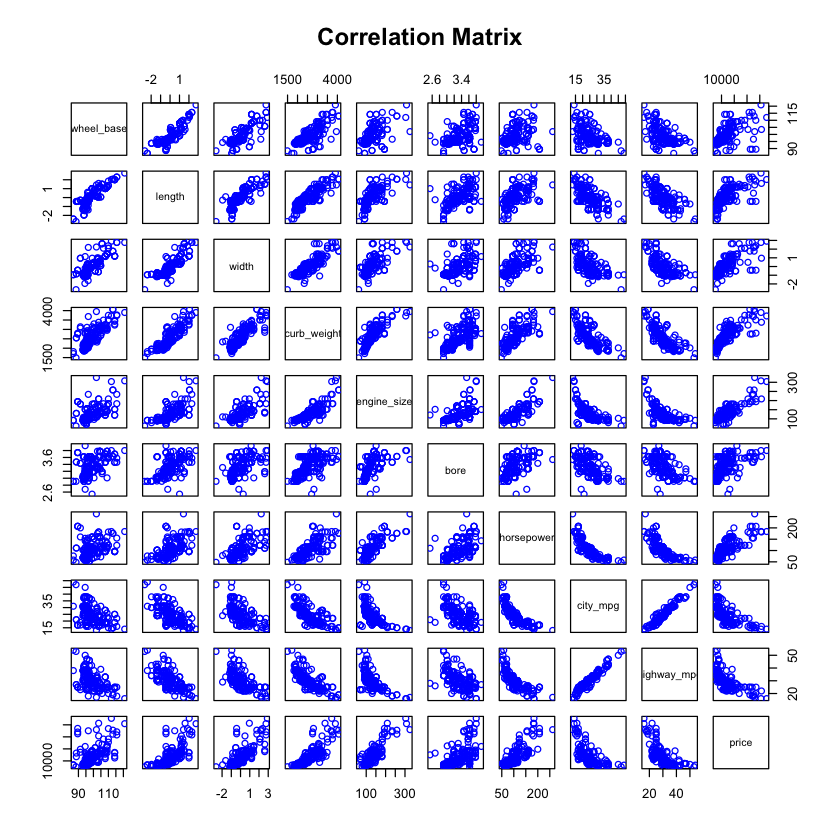

In [45]:
# Correlation matrix of scatter Plot of numeric variables
plot(df[ , c(10,11, 12, 14, 17, 19, 22, 24, 25, 26)], col = 'blue', main = 'Correlation Matrix')

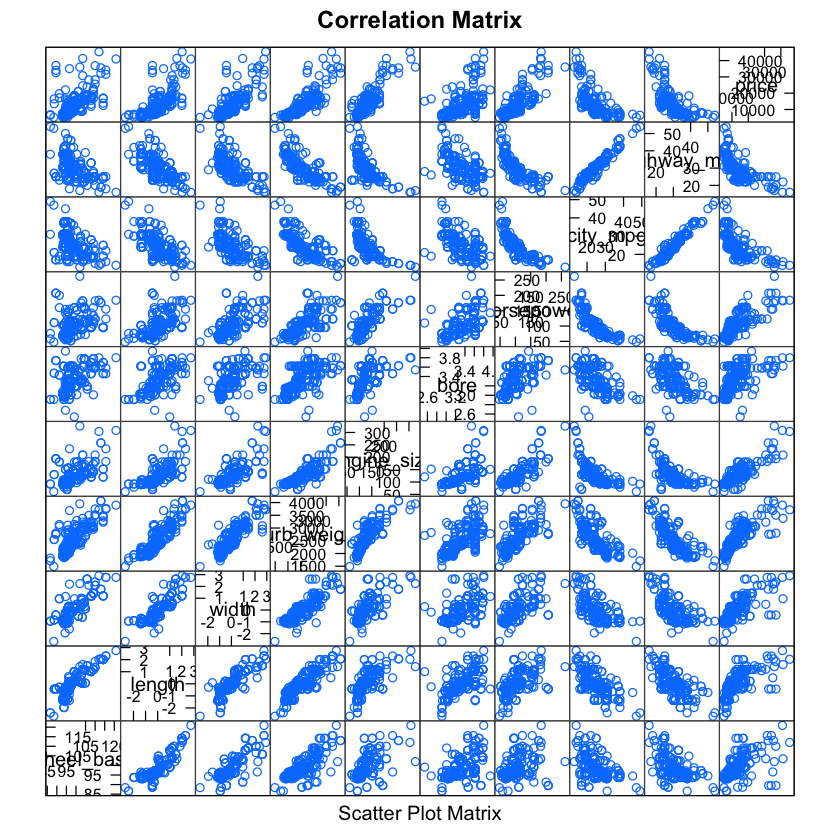

In [46]:
# scatterplot matrix
splom(df[c(10,11, 12, 14, 17, 19, 22, 24, 25, 26)], main="Correlation Matrix")

#### Correlogram
The corrgram function produces a graphical display of a correlation matrix, called a correlogram. The cells of the matrix can be shaded or colored to show the correlation value.

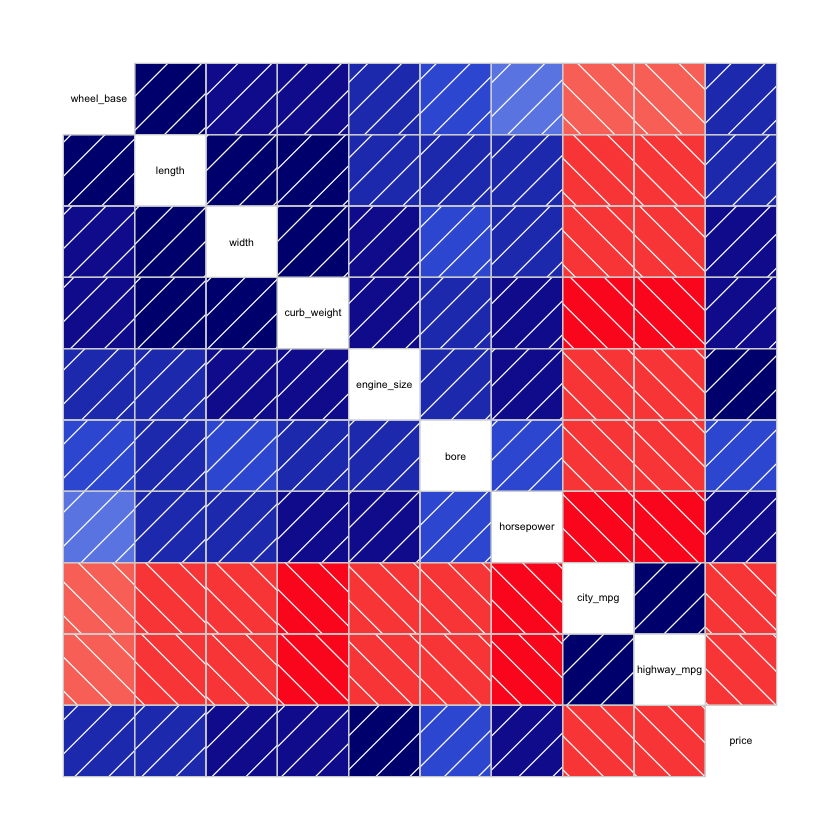

In [47]:
corrgram(df[ , c(10,11, 12, 14, 17, 19, 22, 24, 25, 26)])

#### Correlation plots

In [48]:
df2 <- dplyr::select_if(df, is.numeric)
# calulate the correlations
corln <- cor(df2, use="complete.obs")
round(corln, 2)

symboling normalized_losses wheel_base length width height
symboling          1.00      0.47             -0.54      -0.37  -0.24 -0.55 
normalized_losses  0.47      1.00             -0.06       0.02   0.09 -0.37 
wheel_base        -0.54     -0.06              1.00       0.88   0.81  0.59 
length            -0.37      0.02              0.88       1.00   0.86  0.49 
width             -0.24      0.09              0.81       0.86   1.00  0.31 
height            -0.55     -0.37              0.59       0.49   0.31  1.00 
curb_weight       -0.23      0.10              0.78       0.88   0.87  0.31 
engine_size       -0.11      0.11              0.57       0.69   0.73  0.07 
bore              -0.14     -0.03              0.49       0.61   0.54  0.18 
stroke            -0.01      0.06              0.16       0.12   0.19 -0.06 
compression_ratio -0.18     -0.11              0.25       0.16   0.19  0.26 
horsepower         0.08      0.22              0.37       0.58   0.62 -0.09 
peak_rpm           0.28      0.24             -0.36      -0.29  -0.25 -0.31 
city_mpg          -0.04     -0.23             -0.47      -0.67  -0.63 -0.05 
highway_mpg        0.04     -0.18             -0.54      -0.70  -0.68 -0.10 
price             -0.08      0.13              0.58       0.69   0.75  0.14 
                  curb_weight engine_size bore  stroke compression_ratio
symboling         -0.23       -0.11       -0.14 -0.01  -0.18            
normalized_losses  0.10        0.11       -0.03  0.06  -0.11            
wheel_base         0.78        0.57        0.49  0.16   0.25            
length             0.88        0.69        0.61  0.12   0.16            
width              0.87        0.73        0.54  0.19   0.19            
height             0.31        0.07        0.18 -0.06   0.26            
curb_weight        1.00        0.85        0.64  0.17   0.16            
engine_size        0.85        1.00        0.57  0.21   0.03            
bore               0.64        0.57        1.00 -0.06   0.00            
stroke             0.17        0.21       -0.06  1.00   0.19            
compression_ratio  0.16        0.03        0.00  0.19   1.00            
horsepower         0.76        0.82        0.57  0.10  -0.21            
peak_rpm          -0.28       -0.26       -0.27 -0.06  -0.44            
city_mpg          -0.75       -0.65       -0.58 -0.03   0.33            
highway_mpg       -0.79       -0.68       -0.59 -0.03   0.27            
price              0.83        0.87        0.54  0.08   0.07            
                  horsepower peak_rpm city_mpg highway_mpg price
symboling          0.08       0.28    -0.04     0.04       -0.08
normalized_losses  0.22       0.24    -0.23    -0.18        0.13
wheel_base         0.37      -0.36    -0.47    -0.54        0.58
length             0.58      -0.29    -0.67    -0.70        0.69
width              0.62      -0.25    -0.63    -0.68        0.75
height            -0.09      -0.31    -0.05    -0.10        0.14
curb_weight        0.76      -0.28    -0.75    -0.79        0.83
engine_size        0.82      -0.26    -0.65    -0.68        0.87
bore               0.57      -0.27    -0.58    -0.59        0.54
stroke             0.10      -0.06    -0.03    -0.03        0.08
compression_ratio -0.21      -0.44     0.33     0.27        0.07
horsepower         1.00       0.11    -0.82    -0.80        0.81
peak_rpm           0.11       1.00    -0.12    -0.06       -0.10
city_mpg          -0.82      -0.12     1.00     0.97       -0.69
highway_mpg       -0.80      -0.06     0.97     1.00       -0.70
price              0.81      -0.10    -0.69    -0.70        1.00

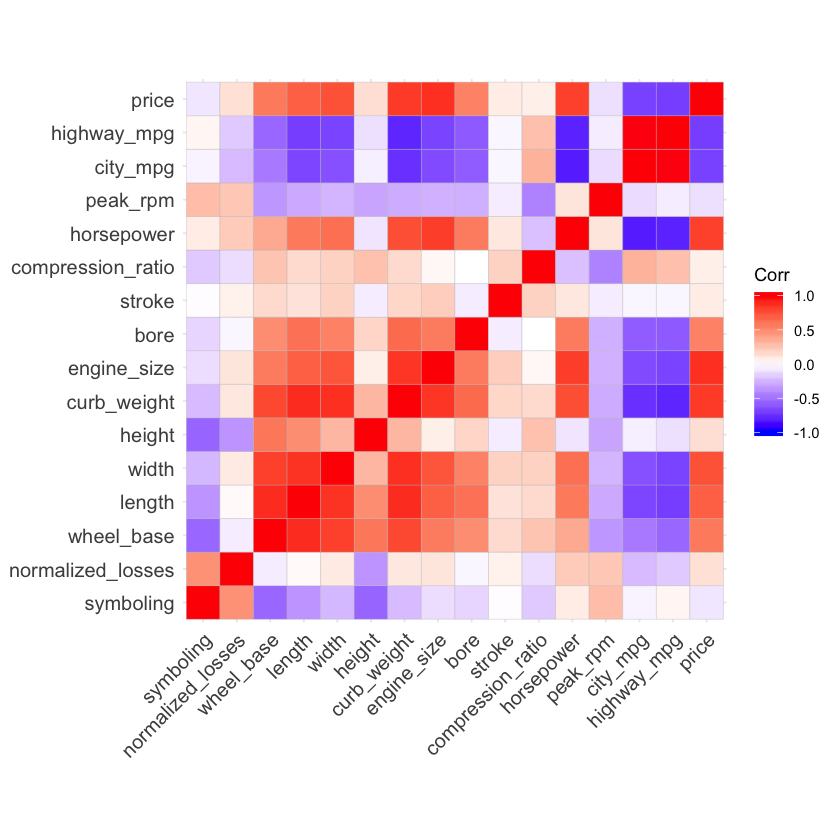

In [49]:
# Correlation Plot
ggcorrplot(corln)

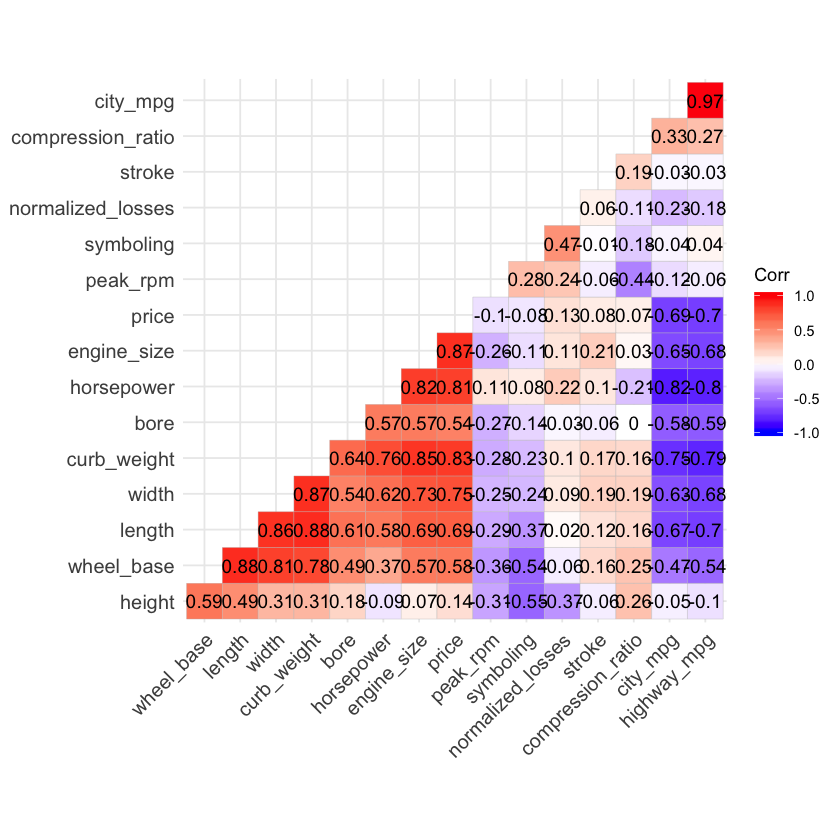

In [50]:
ggcorrplot(corln, hc.order = TRUE, type = "lower", lab = TRUE)

#### Tree Map

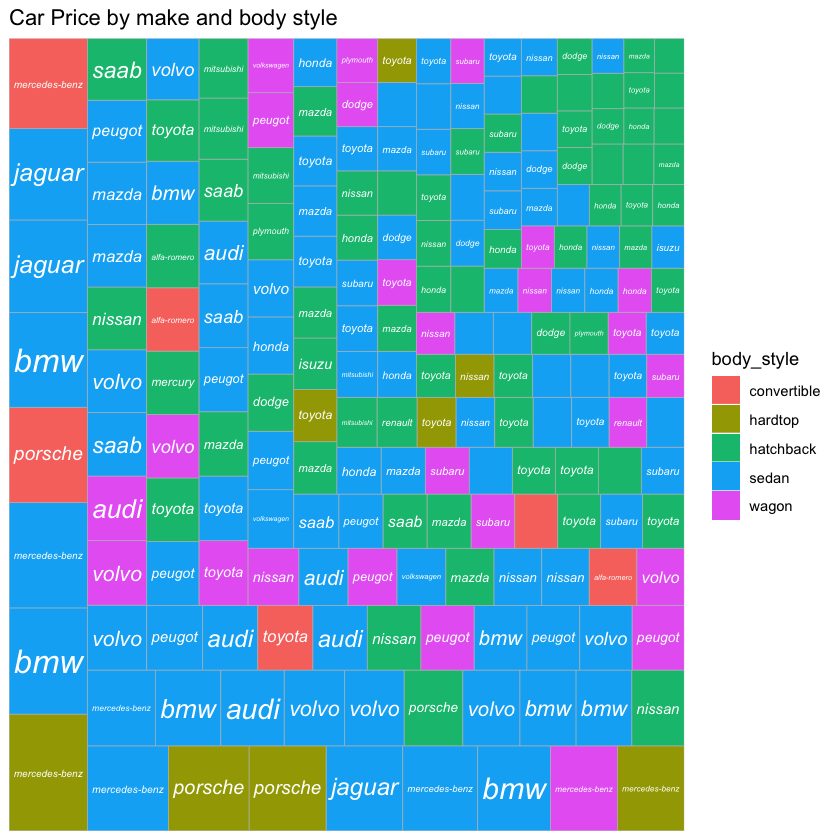

In [51]:
# create a treemap with tile labels
# area = numeric , fill = numeric or categorical, label = categorical variable
ggplot(df, aes(area = price, fill = body_style, label = make)) +
       geom_treemap() +
       geom_treemap_text(fontface = "italic", colour = "white", place = "centre", grow = TRUE)+
       labs(title = "Car Price by make and body style") 

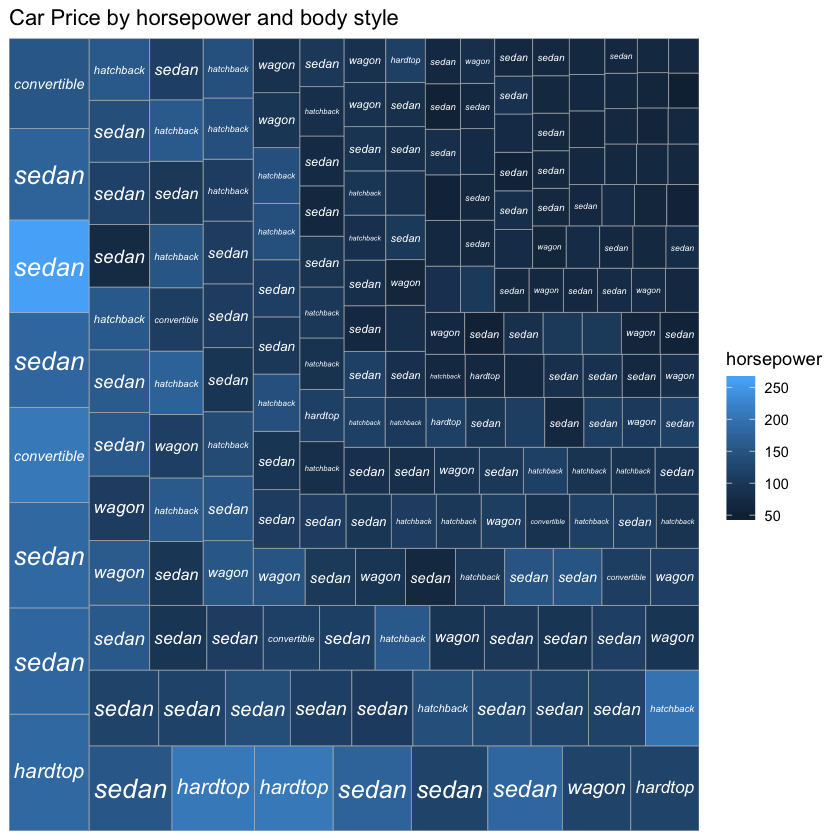

In [52]:
# create a treemap with tile labels
ggplot(df, aes(area = price , fill = horsepower, label = body_style)) +
       geom_treemap() + 
       geom_treemap_text(fontface = "italic", colour = "white", place = "centre", grow = TRUE) +
       labs(title = "Car Price by horsepower and body style") 
       

#### Multiple Bar Chart

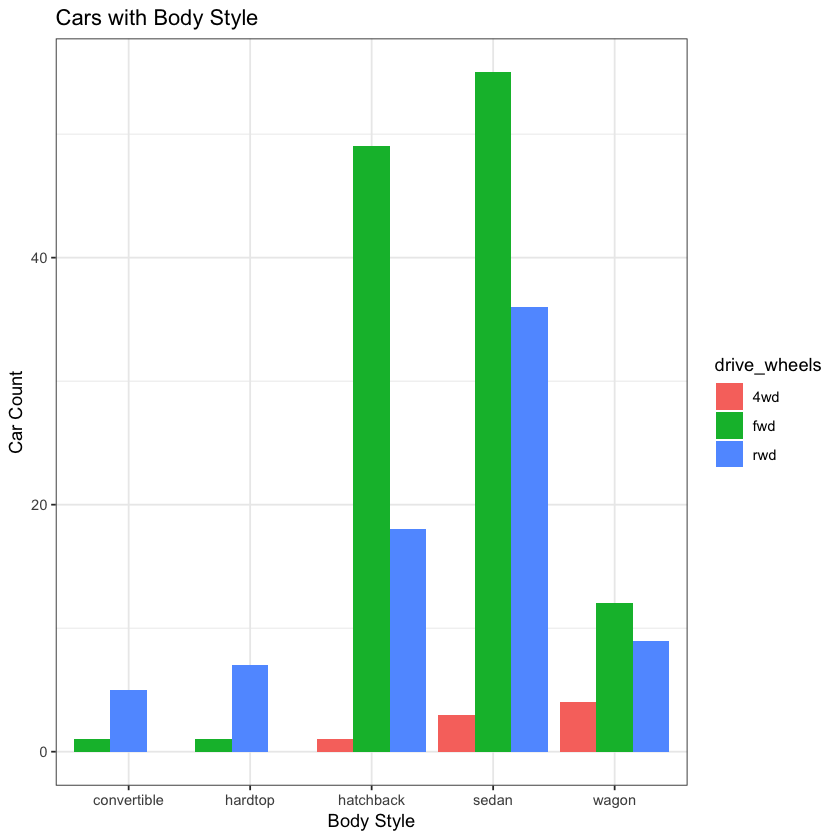

In [53]:
# grouped bar plot preserving zero count bars (Multiple bar chart)
ggplot(df, aes(x = body_style, fill = drive_wheels)) + 
       geom_bar(position = position_dodge(preserve = "single"))+
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

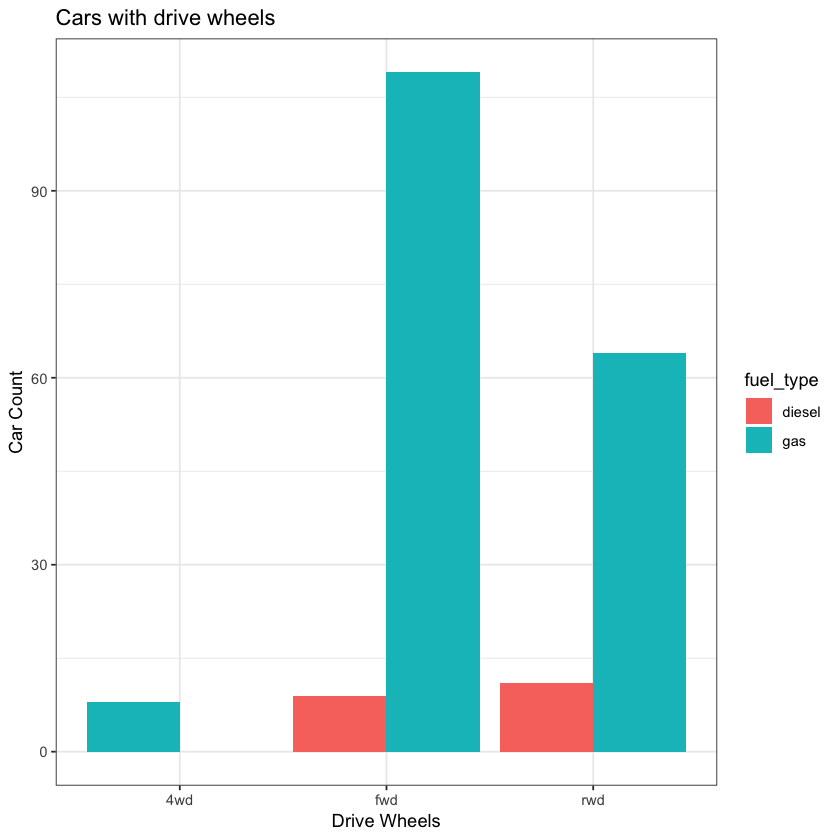

In [54]:
# grouped bar plot preserving zero count bars (Multiple bar chart)
ggplot(df, aes(x = drive_wheels, fill = fuel_type)) + 
       geom_bar(position = position_dodge(preserve = "single"))+
       theme_bw()+
       labs(x = 'Drive Wheels', y = 'Car Count', title = 'Cars with drive wheels' )

#### Multiple Stacked Bar Chart

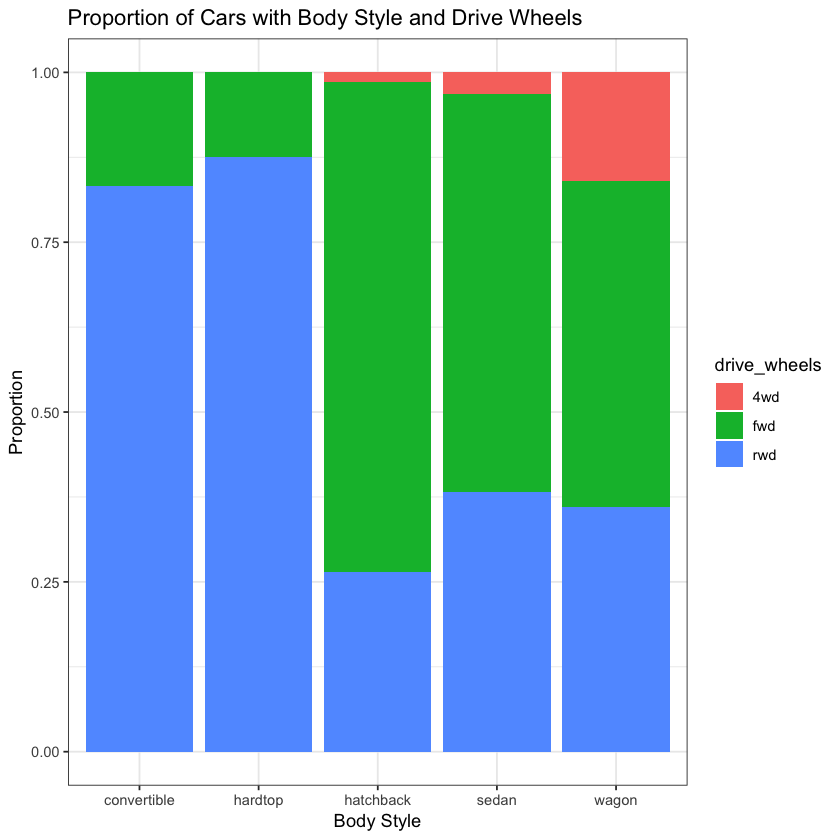

In [55]:
# bar plot, with each bar representing 100% (Stacked or subdivided bar chart)
ggplot(df, aes(x = body_style, fill = drive_wheels)) + 
      geom_bar(position = "fill") +
      theme_bw()+
      labs(x = 'Body Style', y = 'Proportion', 
           title = 'Proportion of Cars with Body Style and Drive Wheels' )

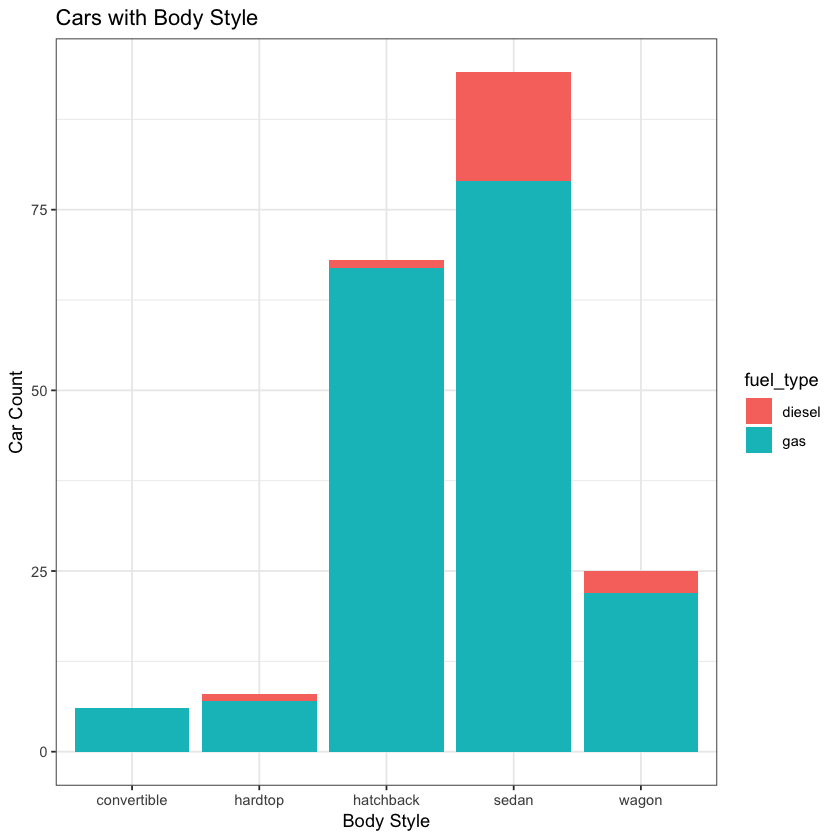

In [56]:
# Bar plot fill by another categorical variable
ggplot(df, aes(x = body_style, fill = fuel_type  )) +  
       geom_bar() + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

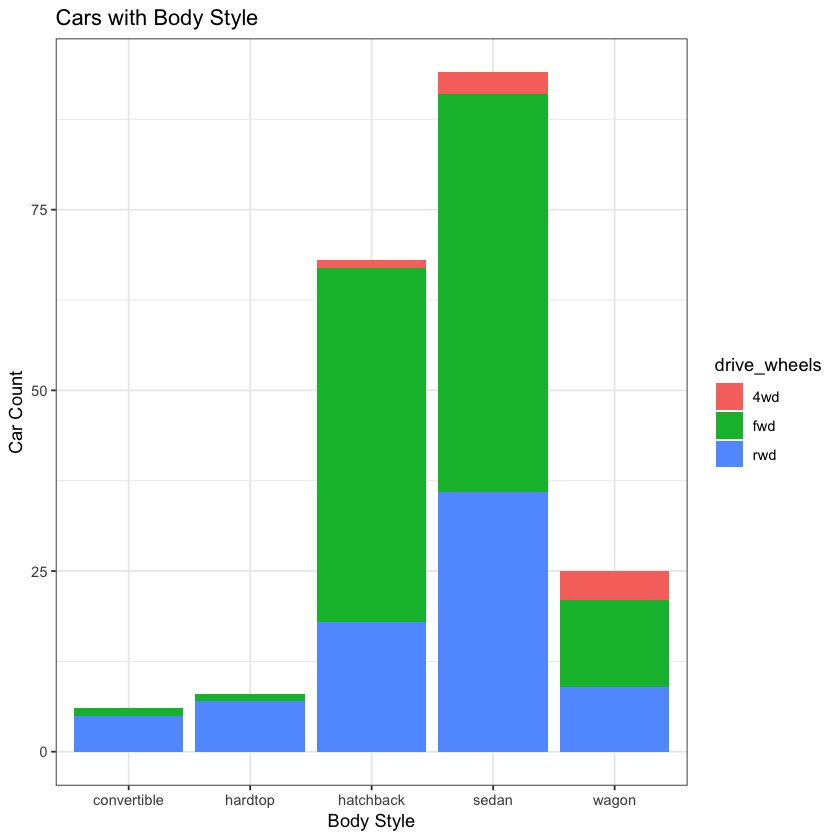

In [57]:
# Bar plot fill by another categorical variable
ggplot(df, aes(x = body_style, fill = drive_wheels)) +  geom_bar() + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

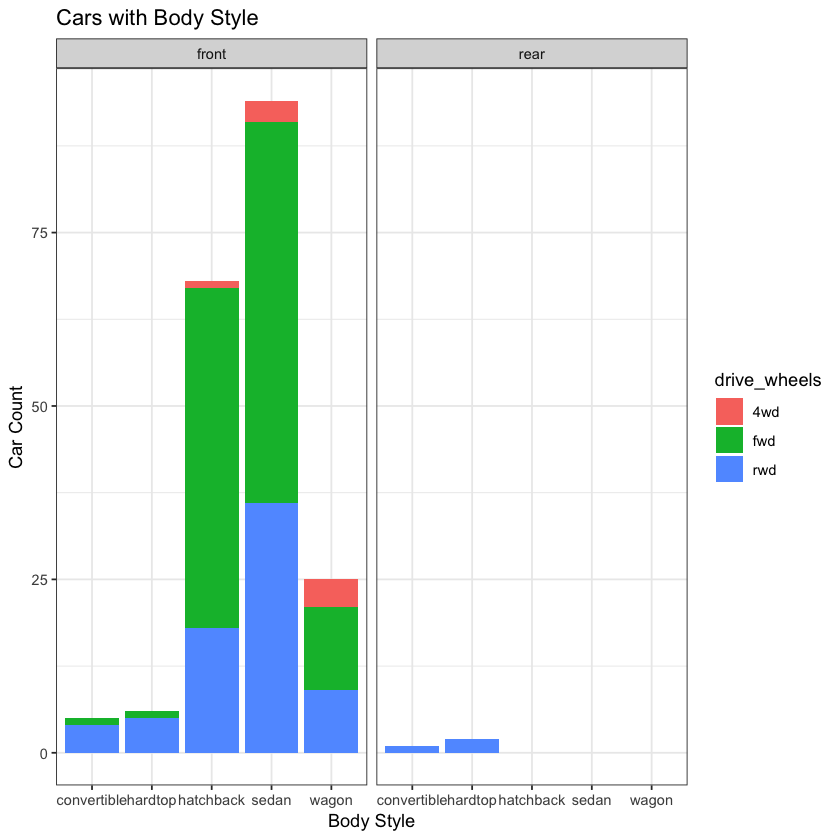

In [58]:
# Bar plot fill by another categorical variable
ggplot(df, aes(x = body_style, fill = drive_wheels)) +  geom_bar() + 
       theme_bw()+
       facet_wrap(~engine_location)+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style' )

## Box Plot

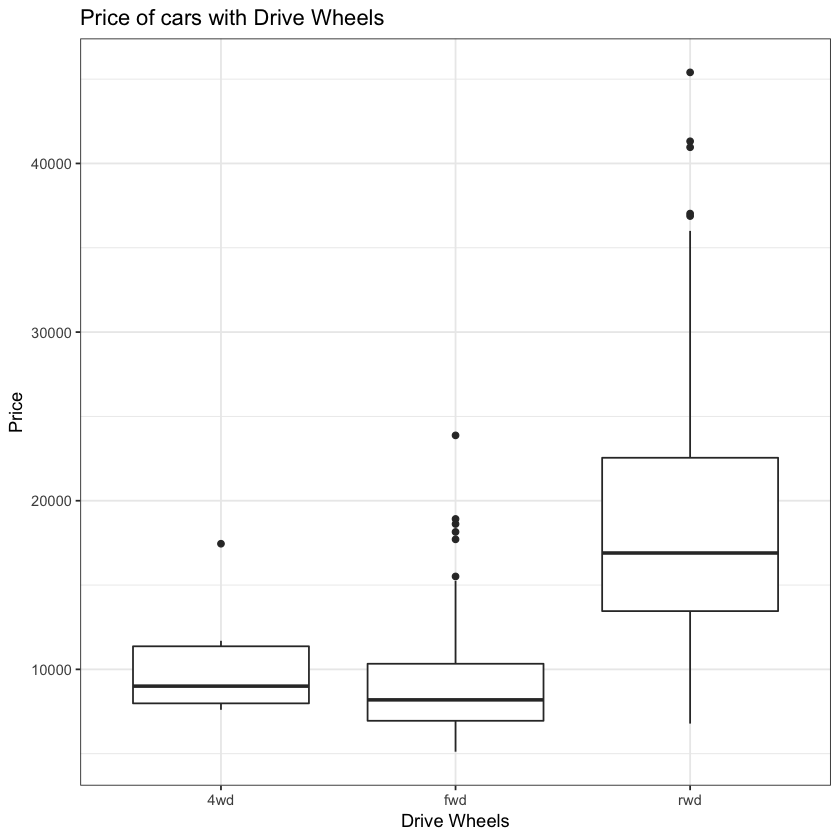

In [59]:
#Box Plot
ggplot(df, aes(x = drive_wheels, y = price)) +  geom_boxplot() + 
       theme_bw()+
       labs(x = 'Drive Wheels', y = 'Price', title = 'Price of cars with Drive Wheels' )

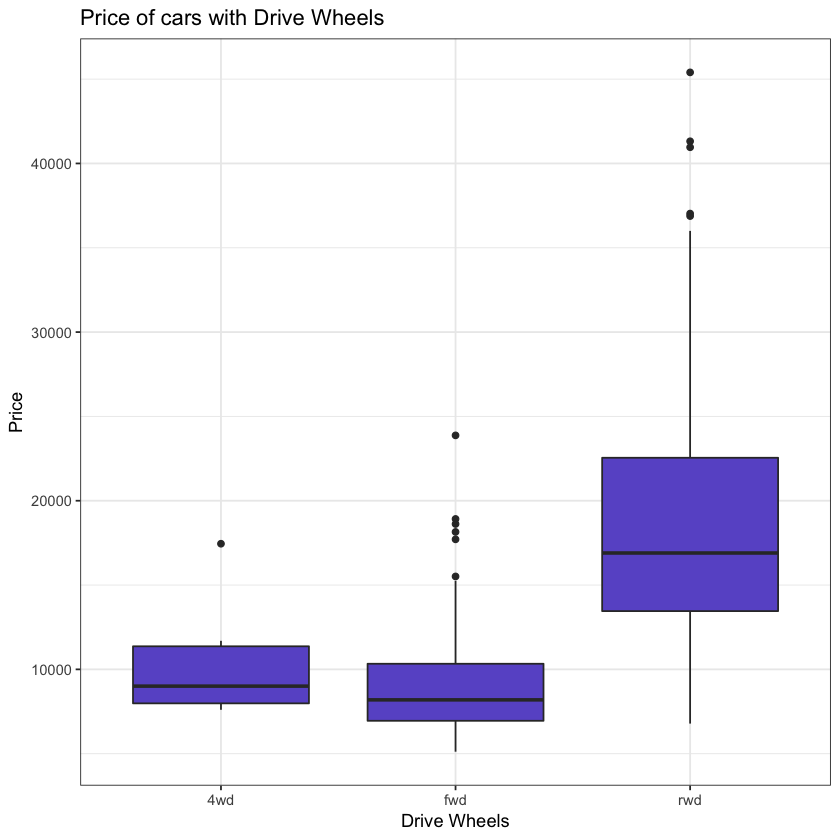

In [60]:
#Box Plot
ggplot(df, aes(x = drive_wheels, y = price)) +  geom_boxplot(fill = 'slateblue') + 
       theme_bw()+
       labs(x = 'Drive Wheels', y = 'Price', title = 'Price of cars with Drive Wheels' )

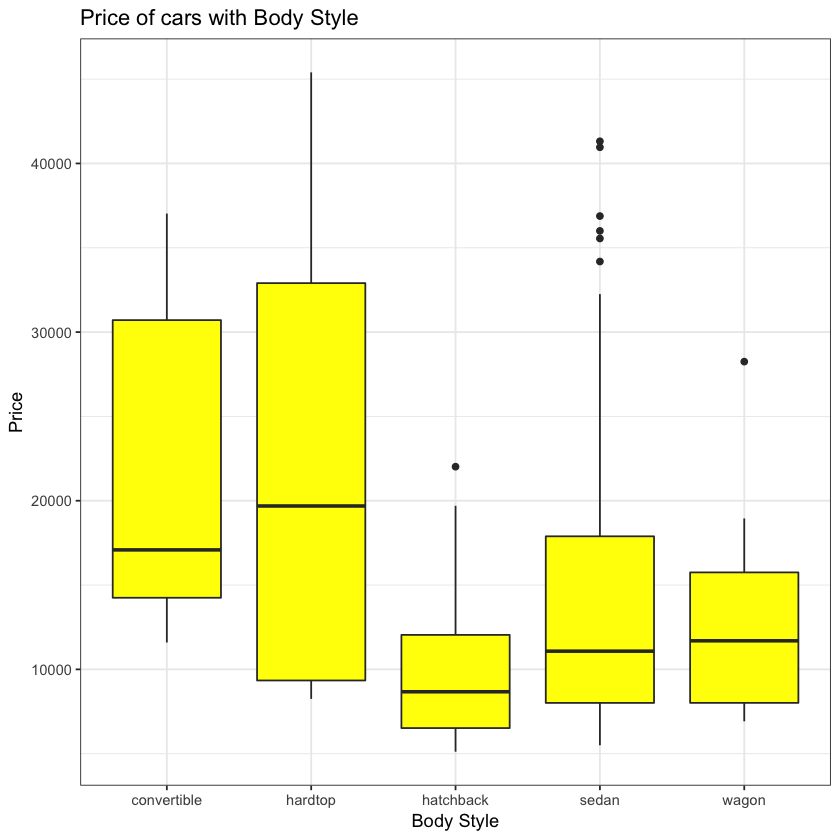

In [61]:
#Box Plot
ggplot(df, aes(x = body_style, y = price)) +  geom_boxplot(fill = 'yellow') + 
       theme_bw()+
       labs(x = 'Body Style', y = 'Price', title = 'Price of cars with Body Style' )

#### Scatter Plot

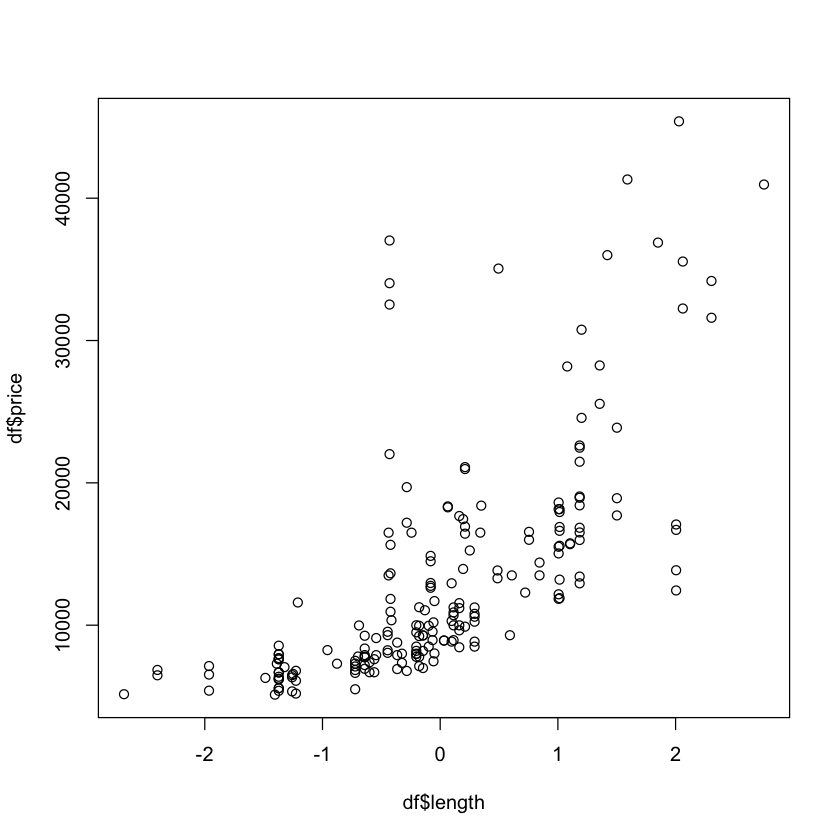

In [63]:
#Scatter Plot
plot(df$length, df$price, )

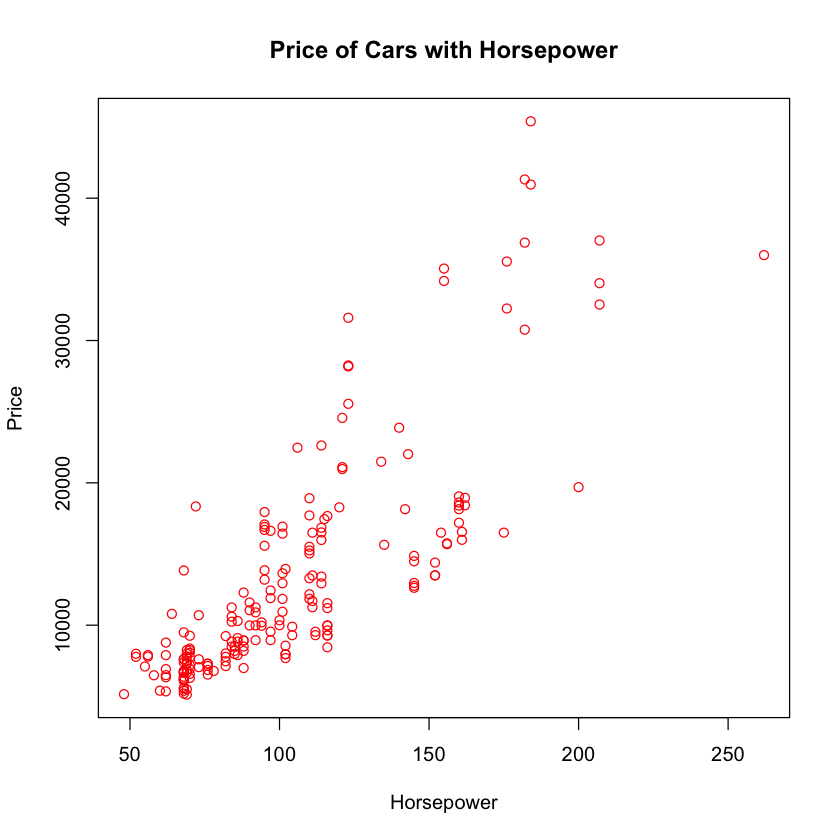

In [65]:
#Scatter Plot
plot(df$horsepower, df$price, xlab = 'Horsepower', ylab = 'Price',
    main = 'Price of Cars with Horsepower', col = 'red')

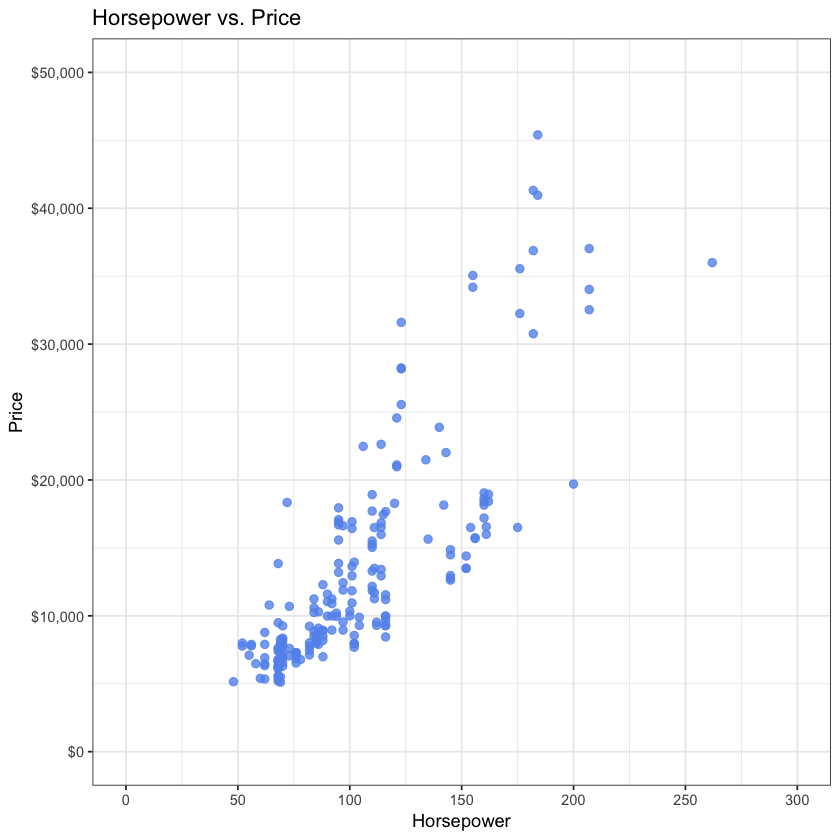

In [66]:
# enhanced scatter plot
ggplot(df, aes(x = horsepower, y = price)) +
     geom_point(color="cornflowerblue", size = 2, alpha=.8) +
     theme_bw()+
     scale_y_continuous(label = scales::dollar, limits = c(0, 50000)) +
     scale_x_continuous(breaks = seq(0, 300, 50), limits=c(0, 300)) + 
     labs(x = "Horsepower", y = "Price", title = "Horsepower vs. Price")

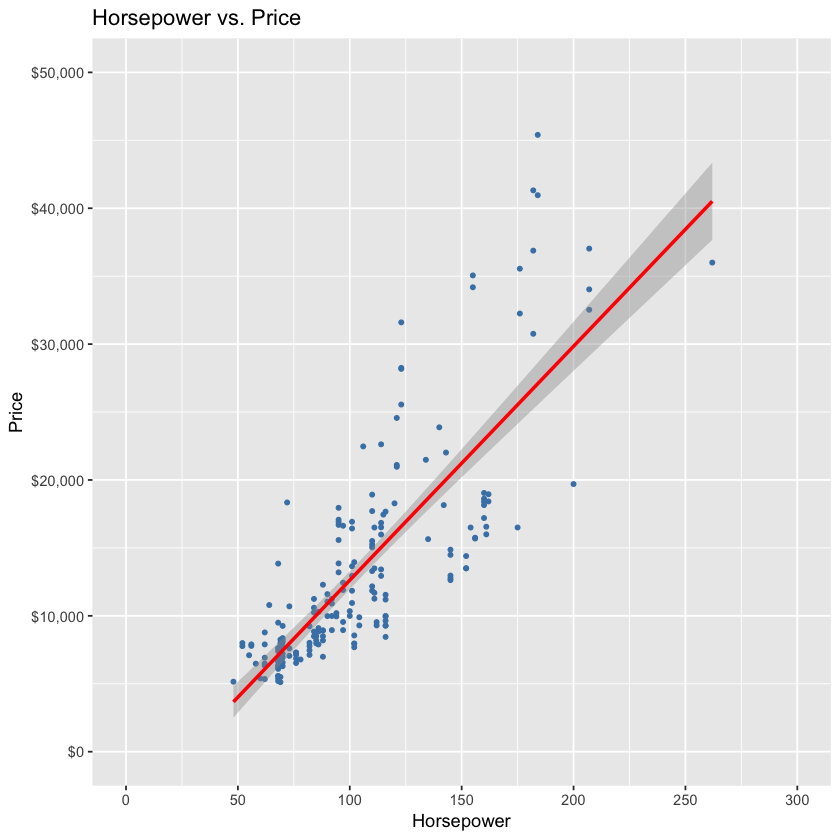

In [67]:
# Enhanced Linear Regression
ggplot(df, aes(x = horsepower, y = price)) +
     geom_point(color="steelblue", size = 1) +
     geom_smooth(method = "lm", color = 'red')+
     scale_y_continuous(label = scales::dollar, limits = c(0, 50000)) +
     scale_x_continuous(breaks = seq(0, 300, 50), limits=c(0, 300)) + 
     labs(x = "Horsepower", y = "Price", title = "Horsepower vs. Price")

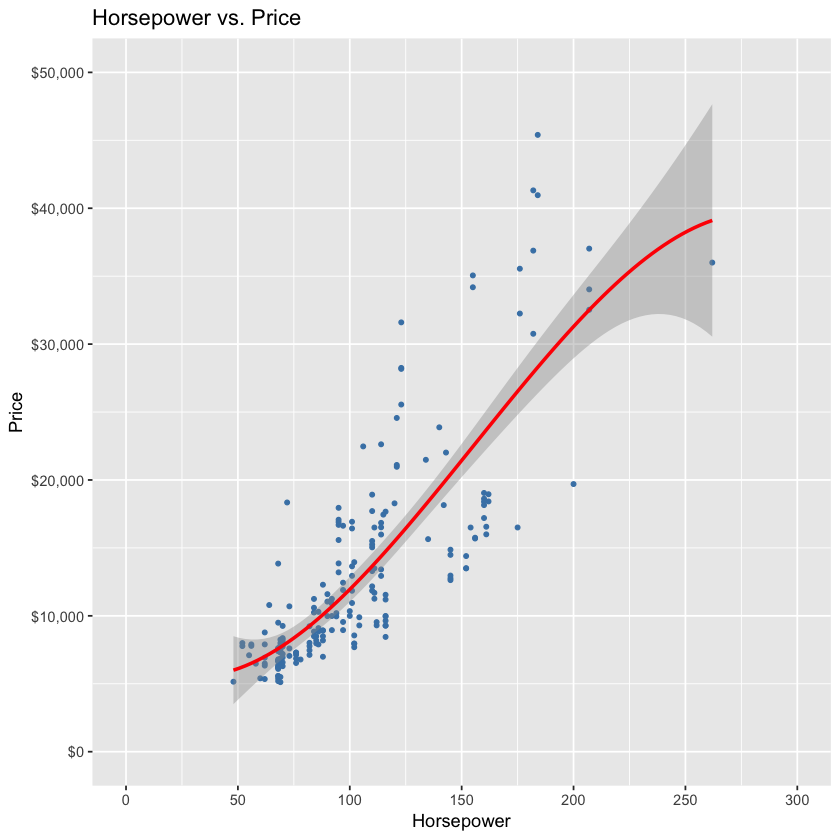

In [68]:
# Enhanced Polynomial Regression
ggplot(df, aes(x = horsepower, y = price)) +
     geom_point(color="steelblue", size = 1) +
     geom_smooth(method = "lm",formula = y ~ poly(x, 3), color = 'red')+
     scale_y_continuous(label = scales::dollar, limits = c(0, 50000)) +
     scale_x_continuous(breaks = seq(0, 300, 50), limits=c(0, 300)) + 
     labs(x = "Horsepower", y = "Price", title = "Horsepower vs. Price")

#### Mosaic plots

In [69]:
# input data
titanic <- read.csv("titanic.csv")

# create a table
tbl <- xtabs(~Survived + Pclass + Sex, titanic)
ftable(tbl)

                Sex female male
Survived Pclass                
0        1               3   77
         2               6   91
         3              72  300
1        1              91   45
         2              70   17
         3              72   47

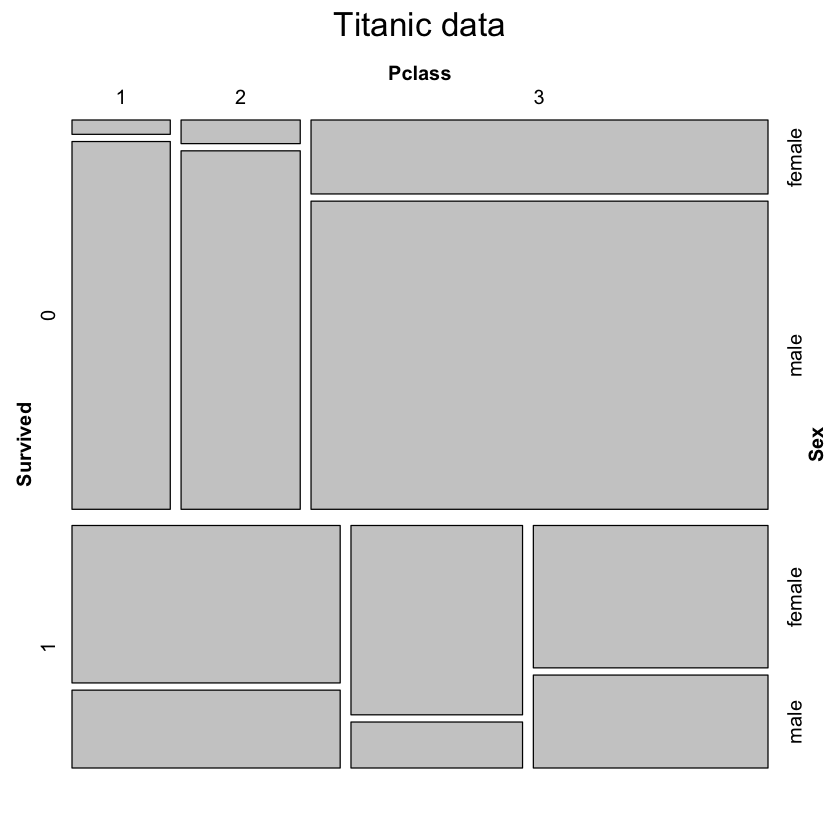

In [70]:
#Mosaic plots
mosaic(tbl, main = "Titanic data")

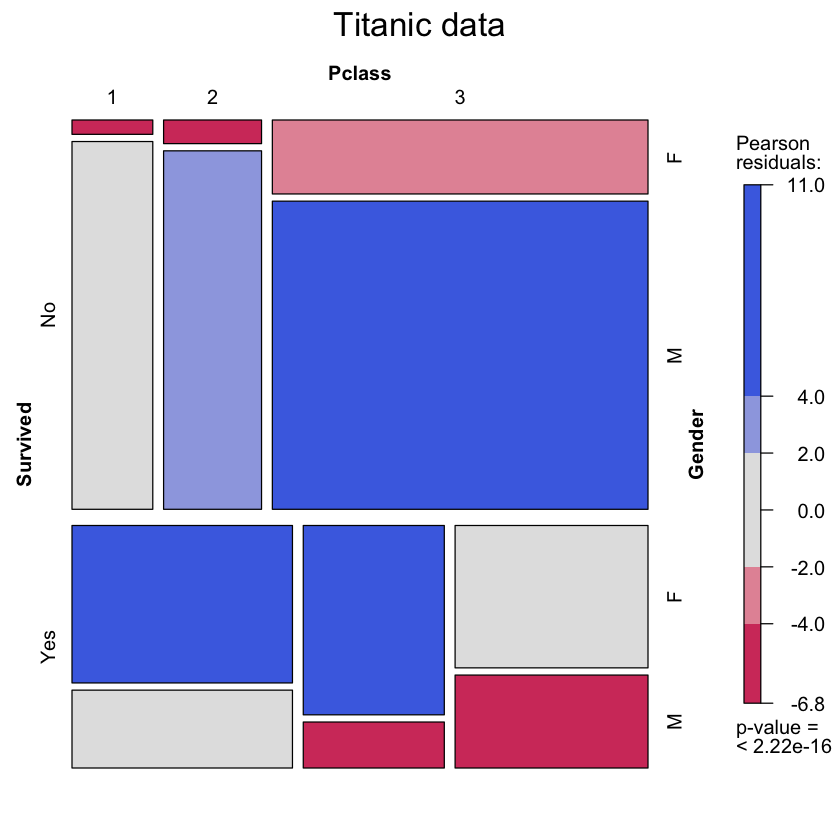

In [71]:
#Mosaic plots
mosaic(tbl, shade = TRUE, legend = TRUE,
       labeling_args = list(set_varnames = c(Sex = "Gender",
                                             Survived = "Survived",
                                             Class = "Passenger Class")),
       set_labels = list(Survived = c("No", "Yes"),
                         Class = c("1st", "2nd", "3rd", "Crew"),
                         Sex = c("F", "M")),
       main = "Titanic data")

#### Vilon Plot

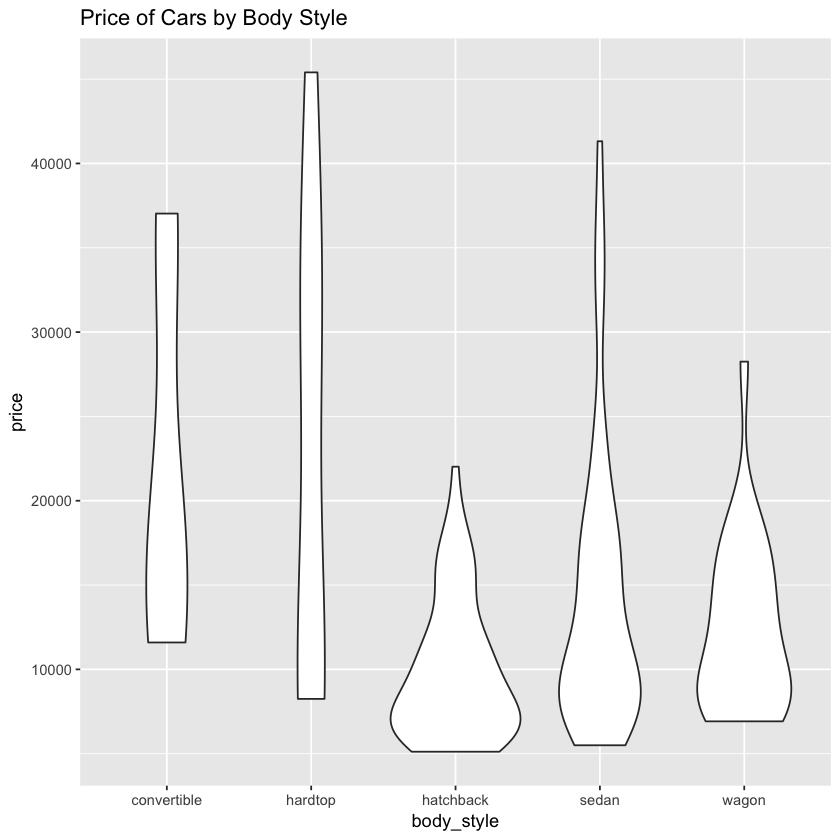

In [72]:
# Vilon Plot 
ggplot(df, aes(x = body_style, y = price)) +
       geom_violin() +
       labs(title = "Price of Cars by Body Style")

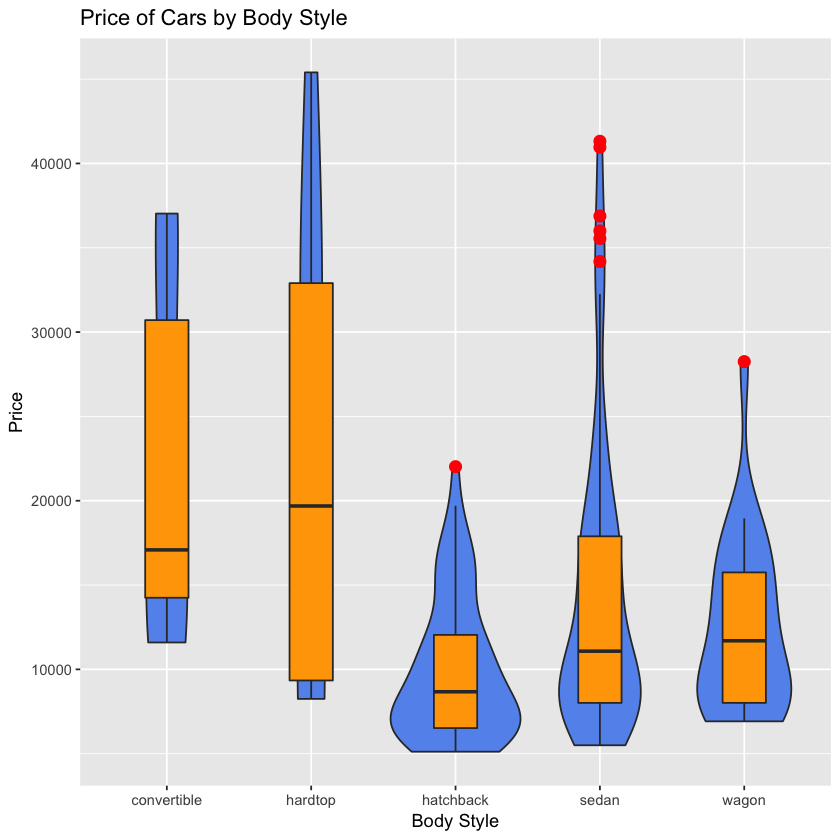

In [73]:
# Vilon Plot 
ggplot(df, aes(x = body_style, y = price)) +
       geom_violin(fill = "cornflowerblue") +
       geom_boxplot(width = .3, fill = "orange", outlier.color = "red", outlier.size = 3) +
       labs(x = "Body Style", y = "Price", title = "Price of Cars by Body Style")

#### Ridgeline plot or Joyplot)

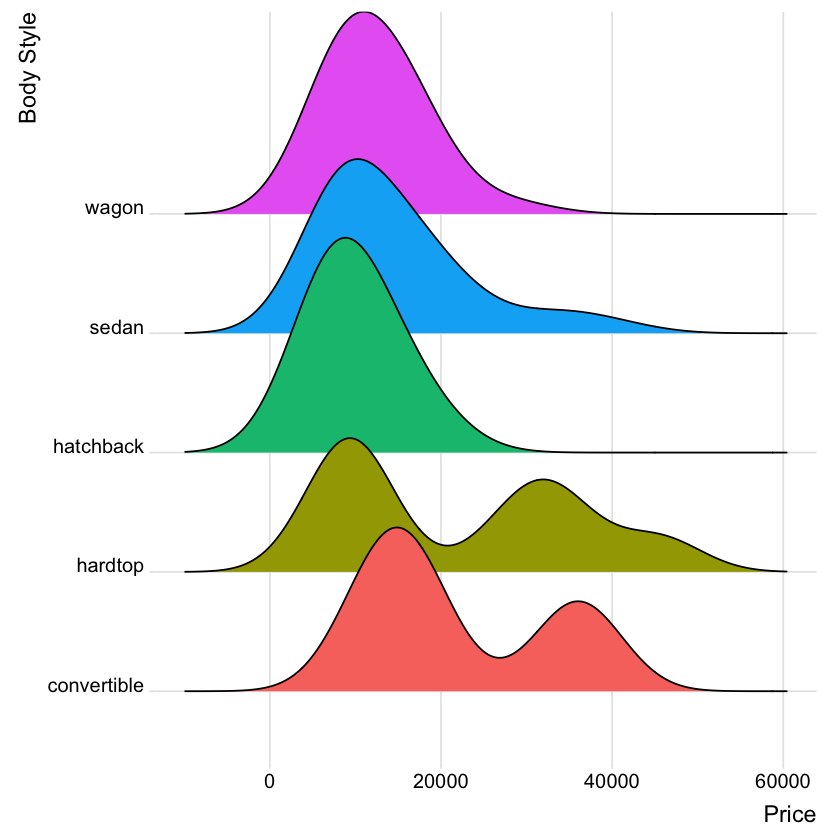

In [74]:
#ridgeline plot or joyplot)
ggplot(df, aes(x = price, y = body_style, fill = body_style )) +
      geom_density_ridges(bandwidth = 5000) + 
      theme_ridges() +
      labs(x = 'Price', y = 'Body Style') +
      theme(legend.position = "none")

#### Grouped scatter plot

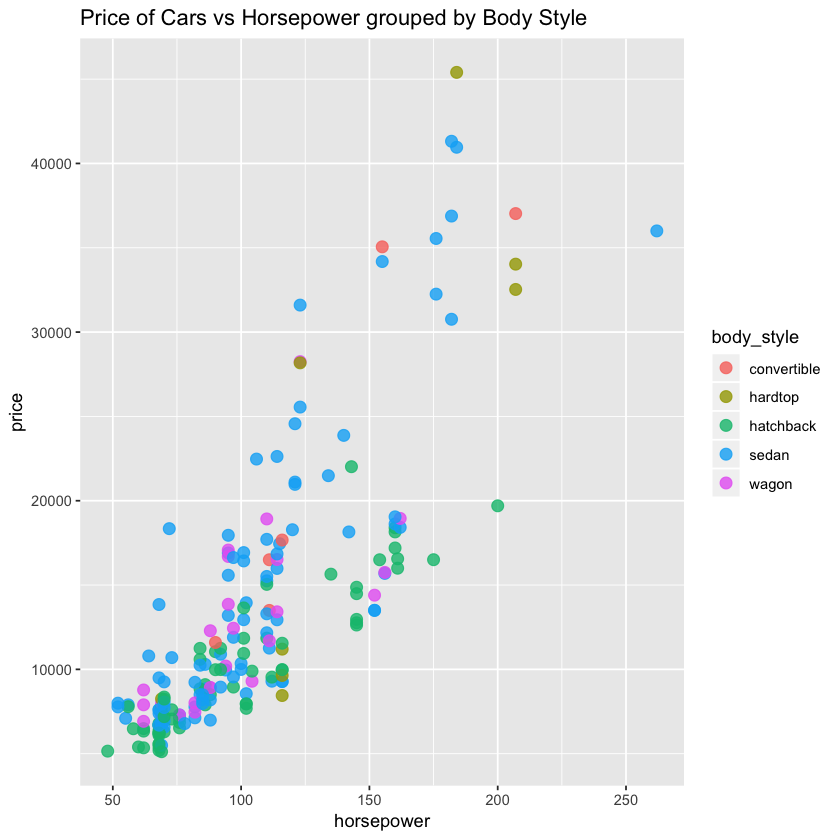

In [75]:
# grouped scatter plot
ggplot(df, aes(x = horsepower, y = price, color=body_style)) +
      geom_point(size = 3, alpha = .8) +
      labs(title = "Price of Cars vs Horsepower grouped by Body Style ")

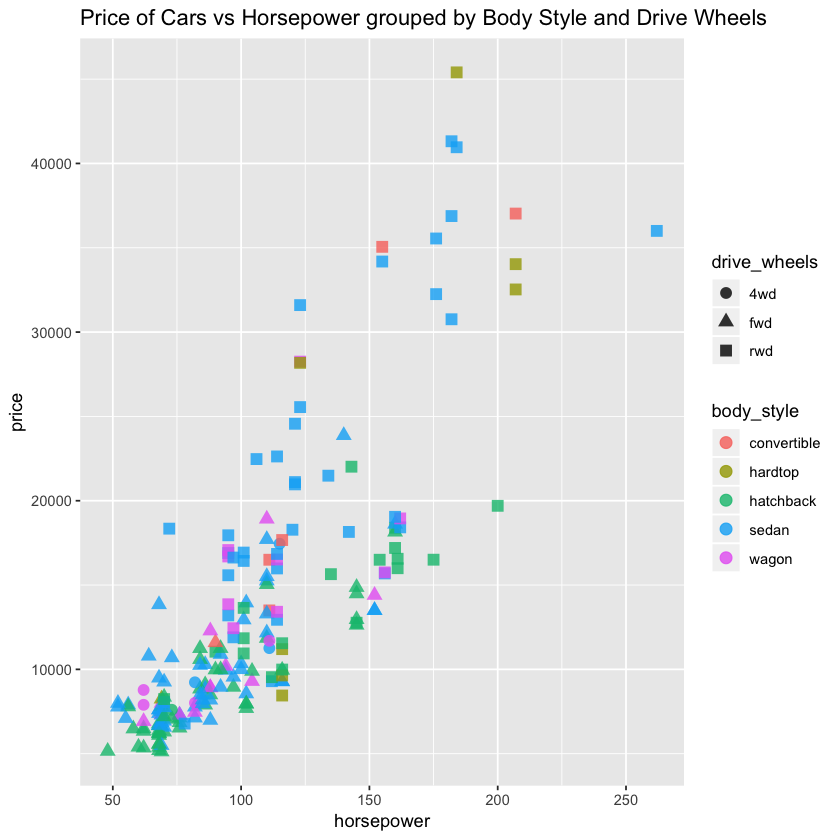

In [76]:
# grouped scatter plot
ggplot(df, aes(x = horsepower, y = price, color=body_style, shape = drive_wheels)) +
      geom_point(size = 3, alpha = .8) +
      labs(title = "Price of Cars vs Horsepower grouped by Body Style and Drive Wheels")

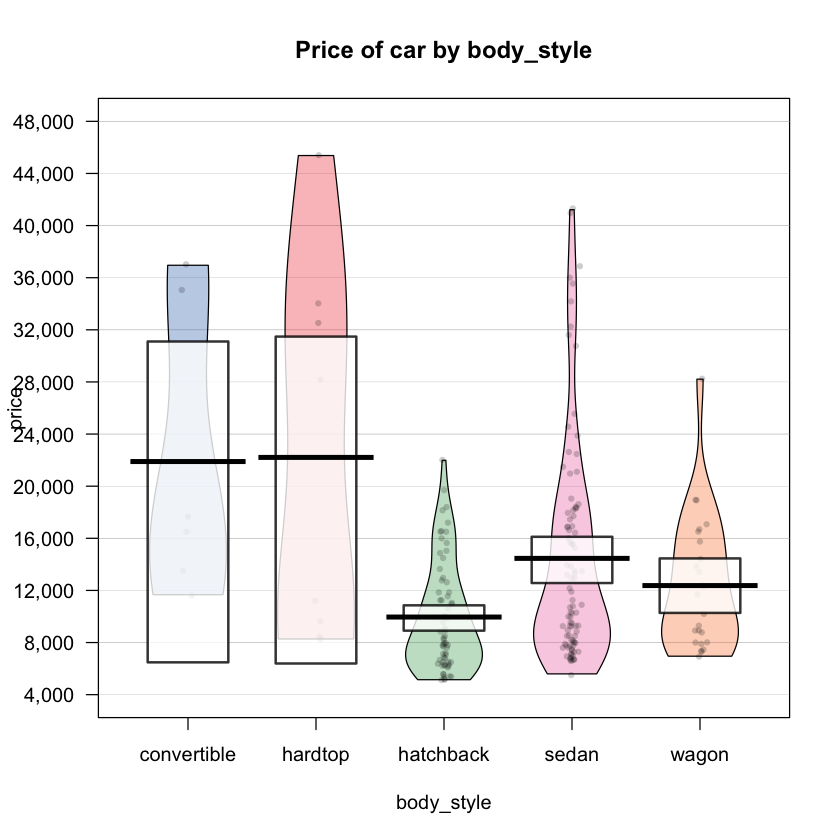

In [77]:
pirateplot(formula = price ~ body_style, 
           data = df,
           main = "Price of car by body_style",
           xlab = "body_style",
           ylab = 'price',
           theme = 1
          )

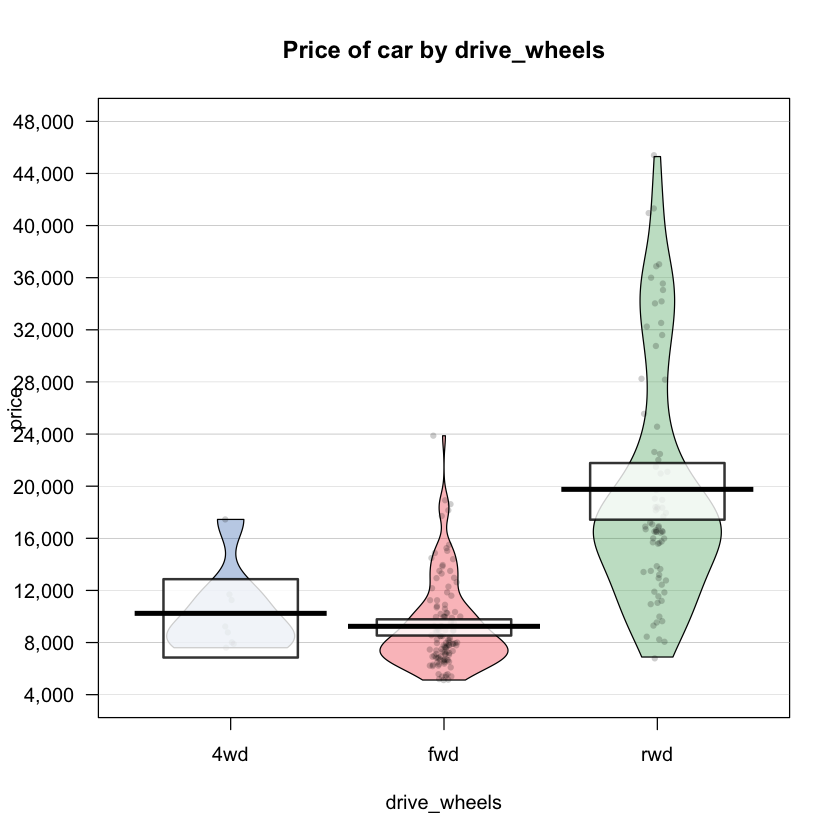

In [78]:
pirateplot(formula = price ~ drive_wheels, 
           data = df,
           main = "Price of car by drive_wheels",
           xlab = "drive_wheels",
           ylab = 'price',
           theme = 1
          )

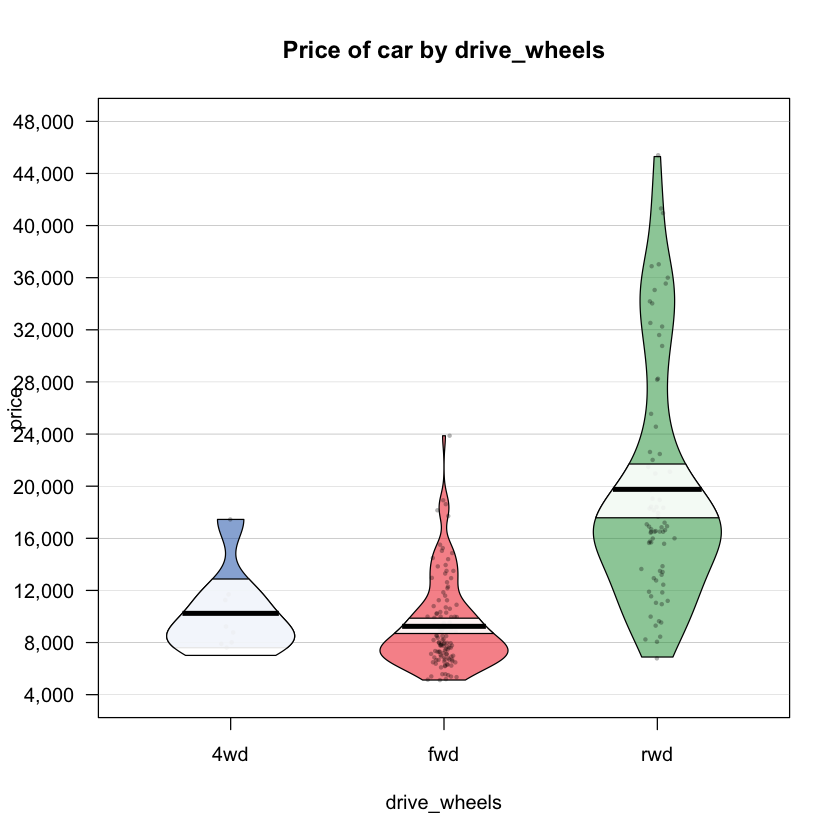

In [79]:
pirateplot(formula = price ~ drive_wheels, 
           data = df,
           main = "Price of car by drive_wheels",
           xlab = "drive_wheels",
           ylab = 'price',
           theme = 3
          )

#### Time series

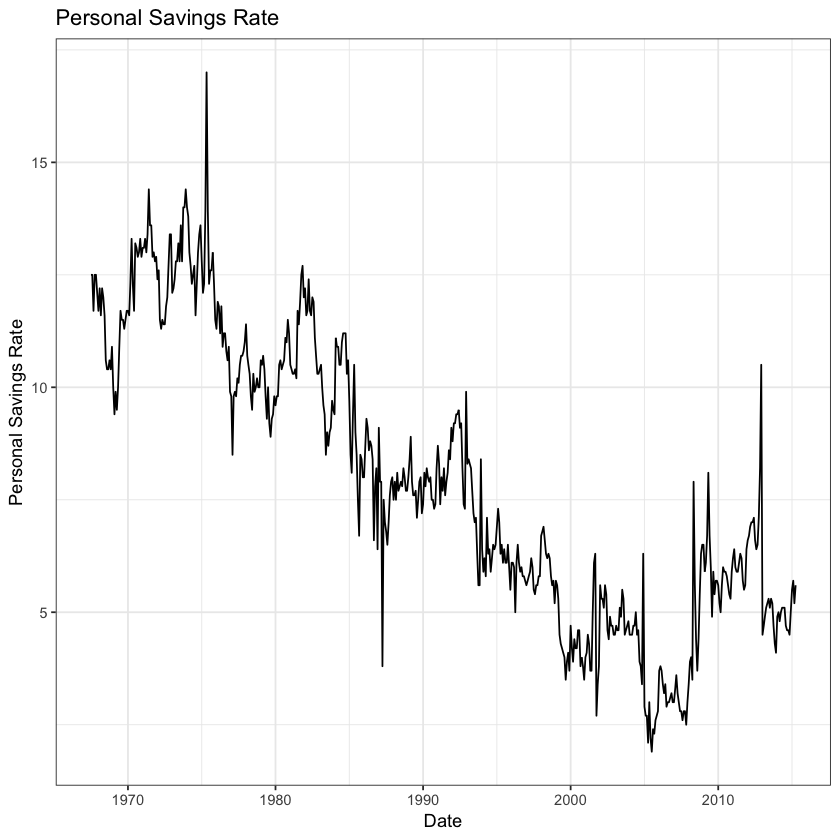

In [80]:
data(economics, package="ggplot2")
ggplot(economics, aes(x = date, y = psavert)) +
       geom_line() +
       theme_bw()+
       labs(title = "Personal Savings Rate", x = "Date", y = "Personal Savings Rate")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


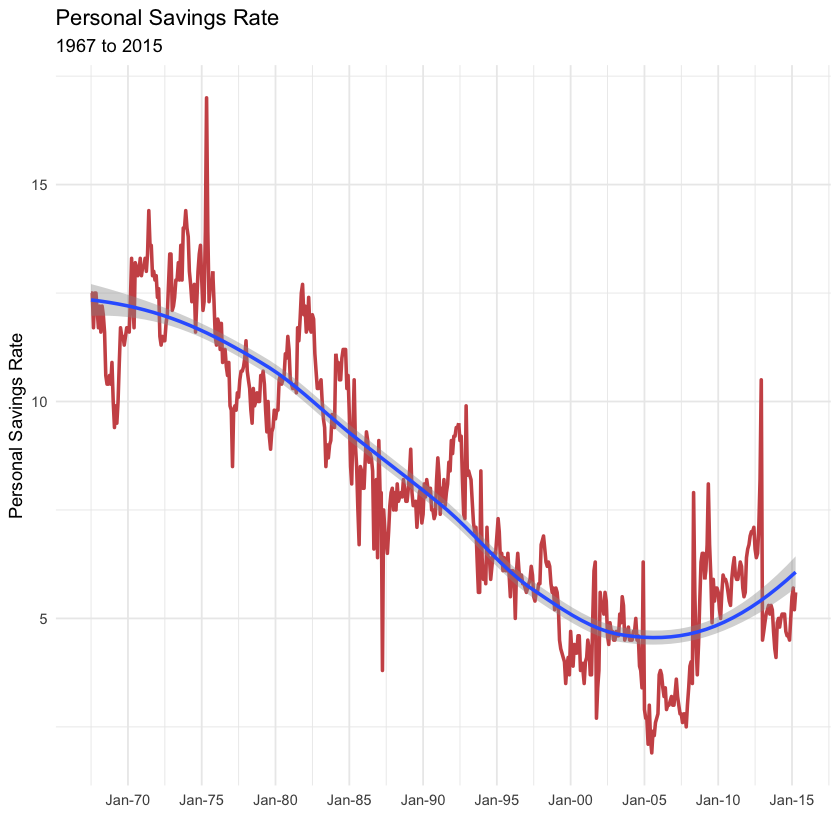

In [81]:
# Time Series
ggplot(economics, aes(x = date, y = psavert)) +
       geom_line(color = "indianred3", size=1 ) +
       geom_smooth(formula = y ~ x) +
       scale_x_date(date_breaks = '5 years', labels = date_format("%b-%y")) +
       labs(title = "Personal Savings Rate", subtitle = "1967 to 2015", x = "",
            y = "Personal Savings Rate") +
       theme_minimal()

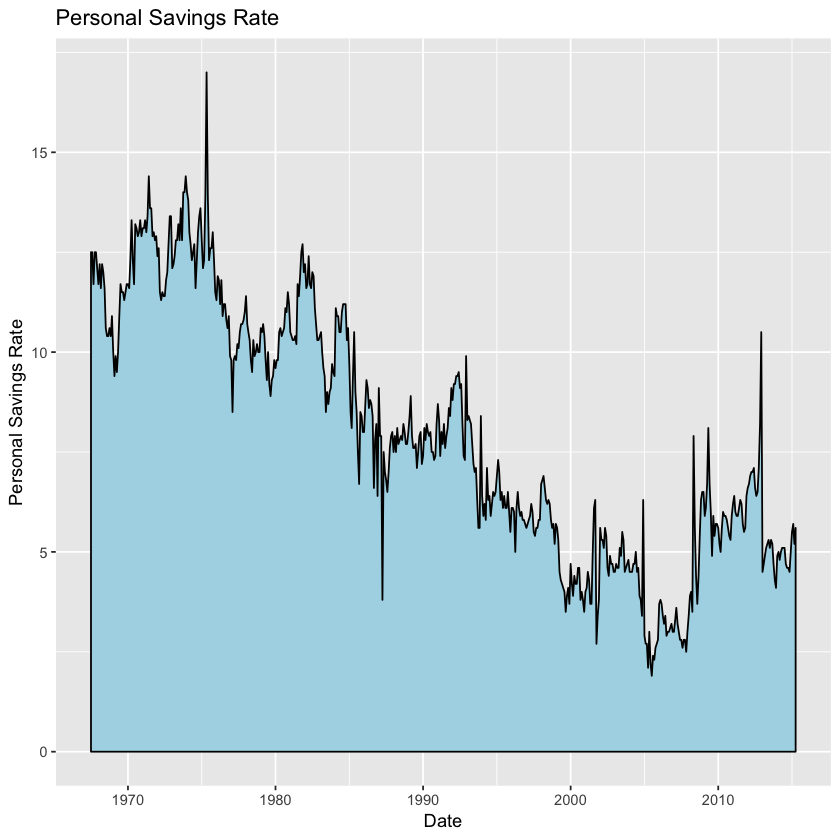

In [82]:
# Area Chart
ggplot(economics, aes(x = date, y = psavert)) +
  geom_area(fill="lightblue", color="black") +
  labs(title = "Personal Savings Rate",
       x = "Date",
       y = "Personal Savings Rate")

### Maps
#### Basic maps

In [4]:
library(readr)
library(ggplot2)
library(dplyr)
library(yarrr)
library(e1071)
library(usmap)
library(maps)
library(ggmap)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


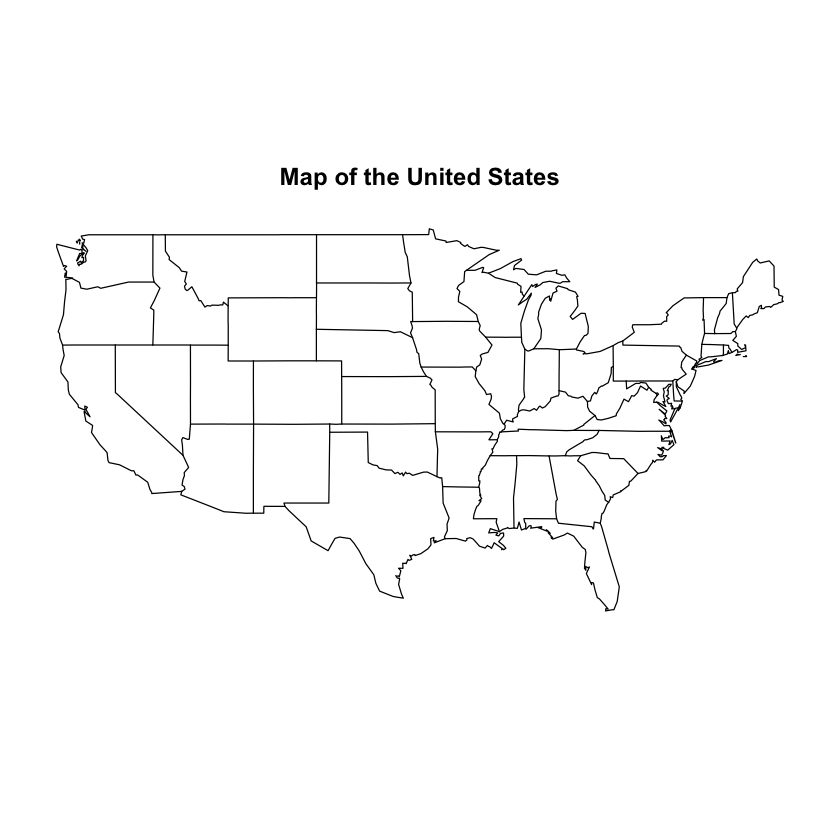

In [6]:
# Map of usa
map(database='state')
title('Map of the United States')

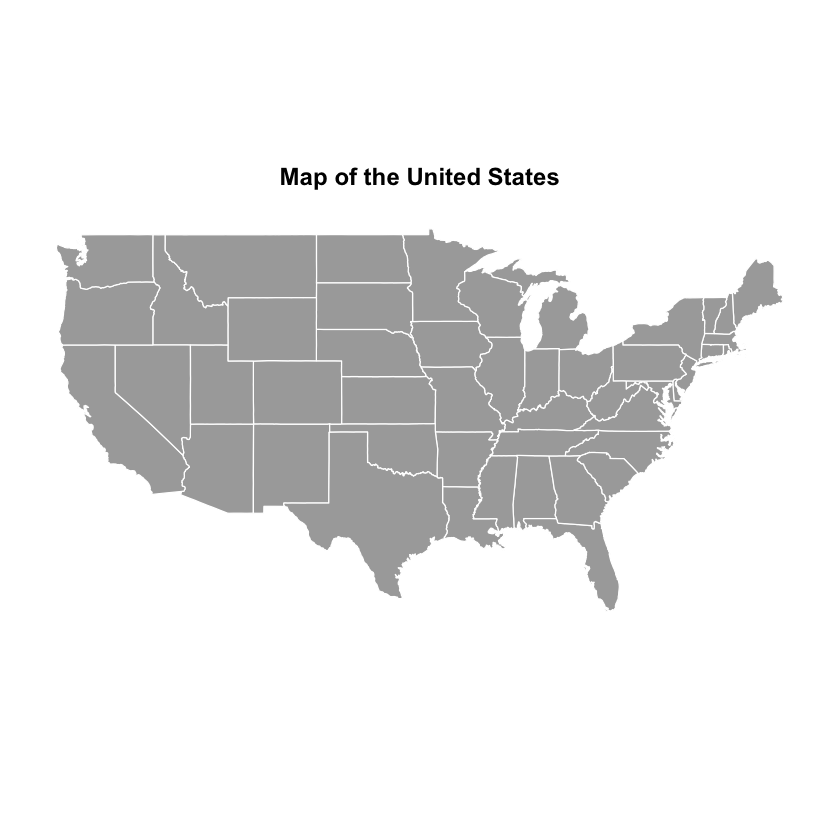

In [7]:
map('state', col = "darkgray", fill = TRUE, border = "white")
# add a title to your map
title('Map of the United States')

In [8]:
data <- read.csv('ABC_locations.csv')
head(data)

Address                   City       State   Zip.Code   Latitude Longitude 
1 1205 N. Memorial Parkway  Huntsville Alabama 35801-5930 34.74309  -86.60096
2 3650 Galleria Circle      Hoover     Alabama 35244-2346 33.37765  -86.81242
3 8251 Eastchase Parkway    Montgomery Alabama 36117      32.36389  -86.15088
4 5225 Commercial Boulevard Juneau     Alaska  99801-7210 58.35920 -134.48300
5 330 West Dimond Blvd      Anchorage  Alaska  99515-1950 61.14327 -149.88422
6 4125 DeBarr Road          Anchorage  Alaska  99508-3115 61.21081 -149.80434

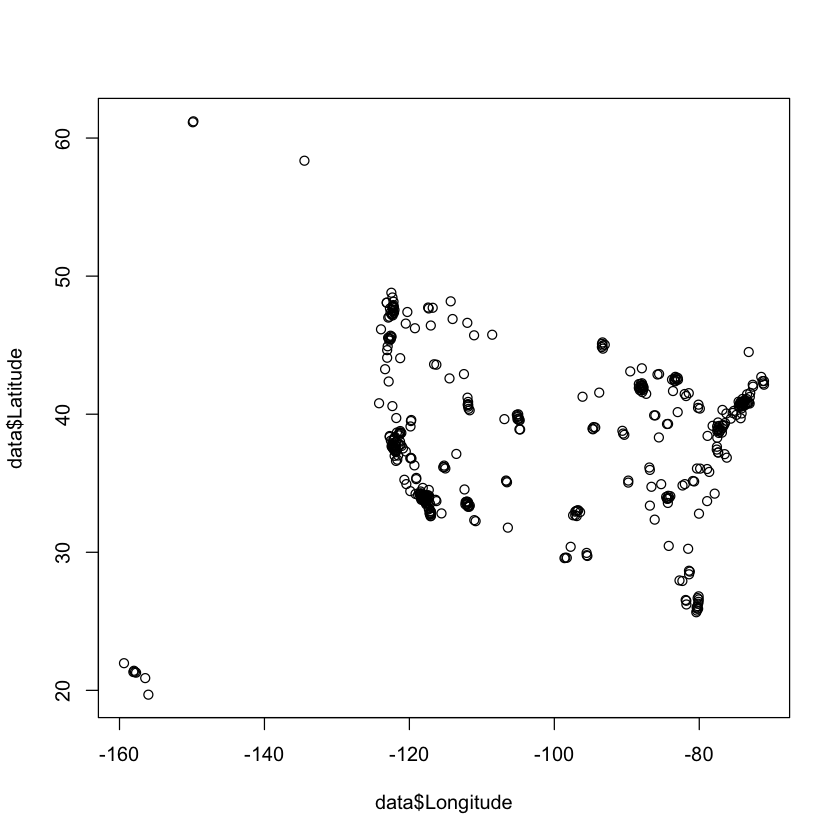

In [8]:
plot(data$Longitude, data$Latitude)

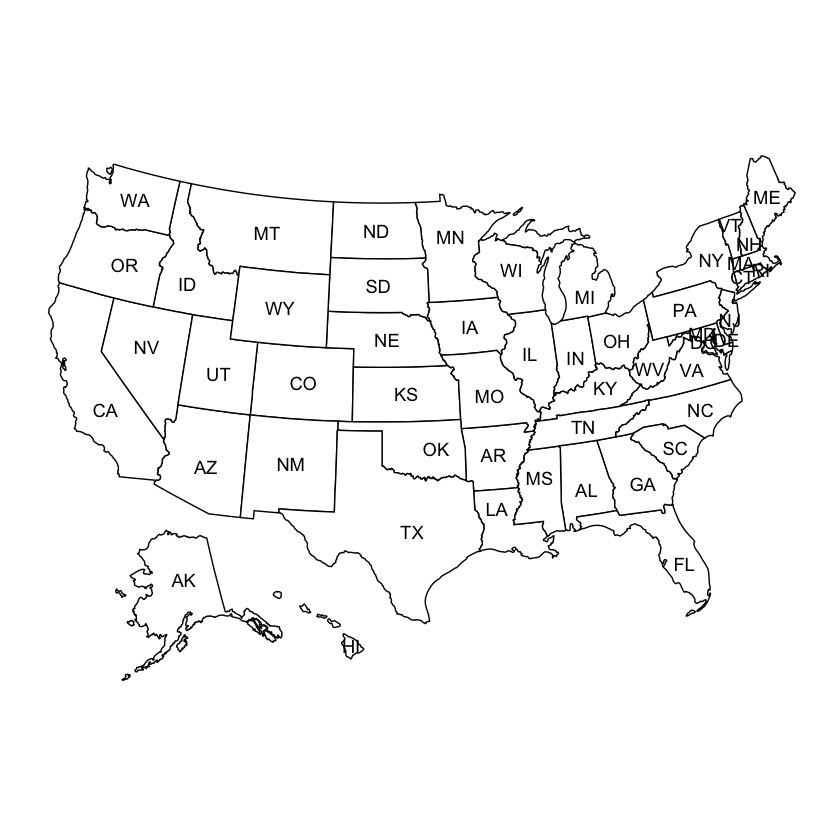

In [9]:
# Map of usa
usmap::plot_usmap("states", labels = TRUE)

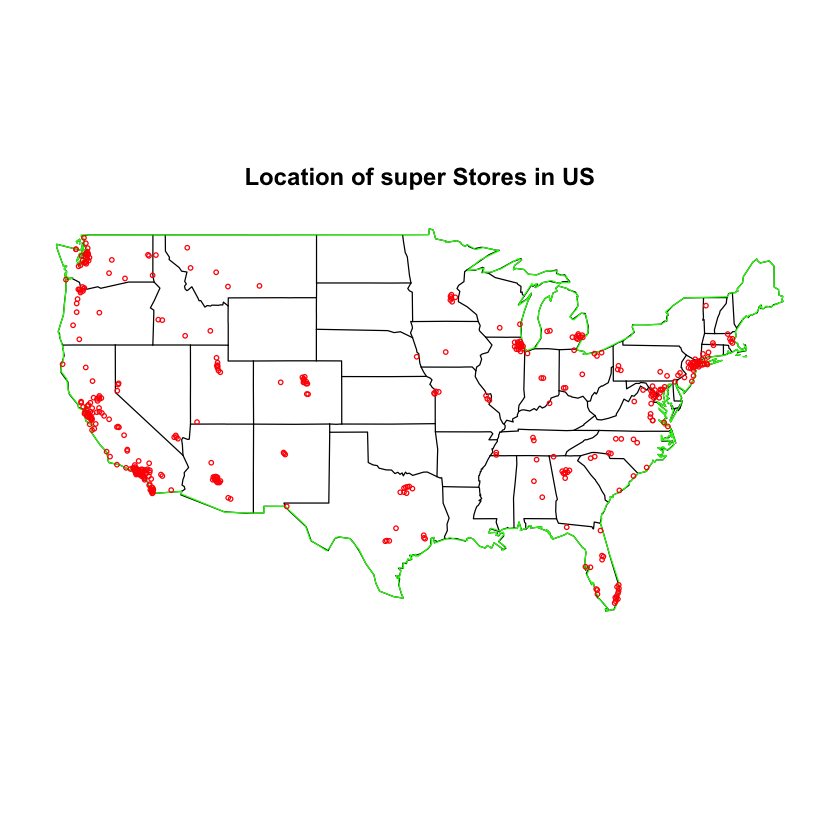

In [10]:
map('state')
#make changes on the map of usa
map(database = "usa", col = "green", lwd = 1, add = TRUE)
# add locations
title("Location of super Stores in US")
# add the x, y for the location of the stores
#pch = shape, cex = size
points(x = data$Longitude, y = data$Latitude, pch = 1, col = "red", cex = 0.5)

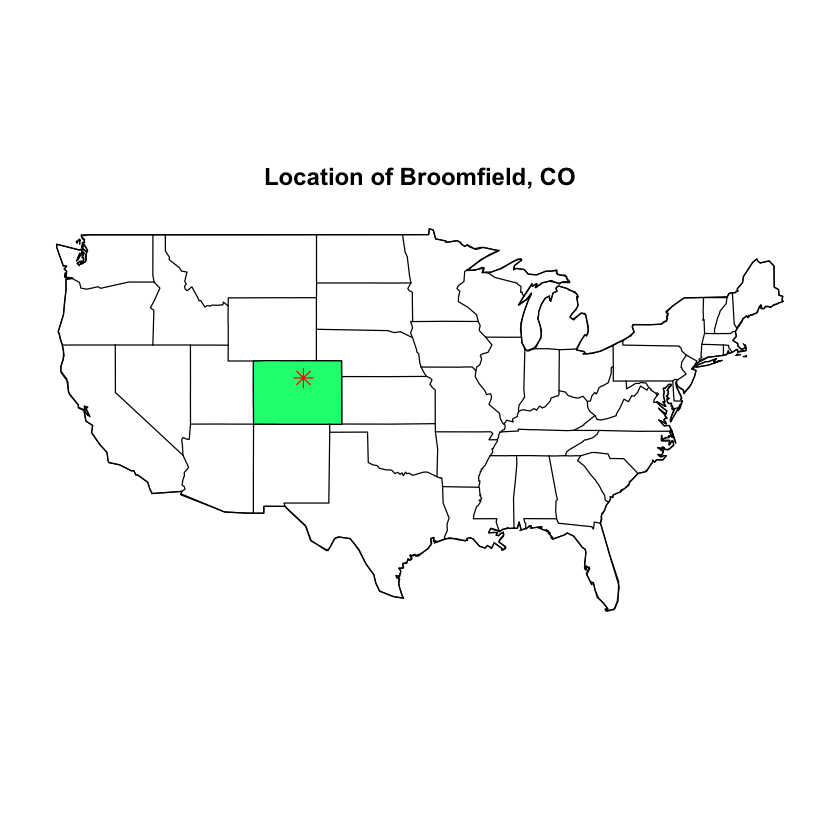

In [11]:
map('state')
map(database = "usa", lwd = 1, add = TRUE)
# add the adjacent parts of the US; can't forget my homeland
map("state", "colorado", col = "springgreen",
    lwd = 1, fill = TRUE, add = TRUE)
# add gage location
title("Location of Broomfield, CO")
# add the x, y for the location of Broomfield CO
#pch = shape, cex = size
points(x = -105.086647, y = 39.920540, pch = 8, col = "red", cex = 1.5)

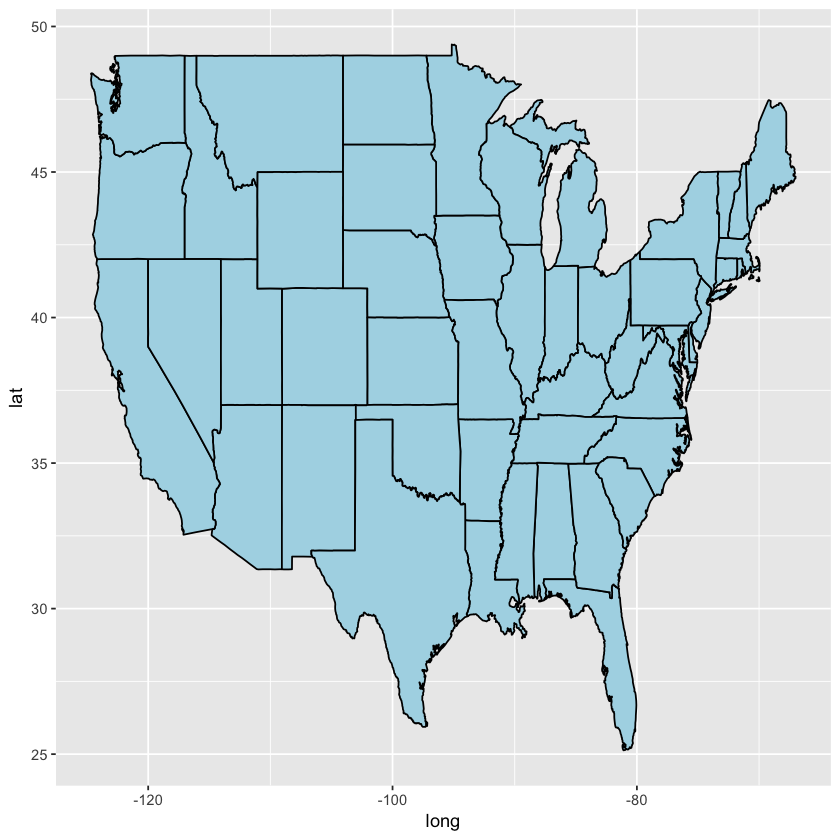

In [12]:
ggplot() + 
  geom_polygon( data=map_data("state"), aes(x=long, y=lat, group=group),
                color="black", fill="lightblue" )

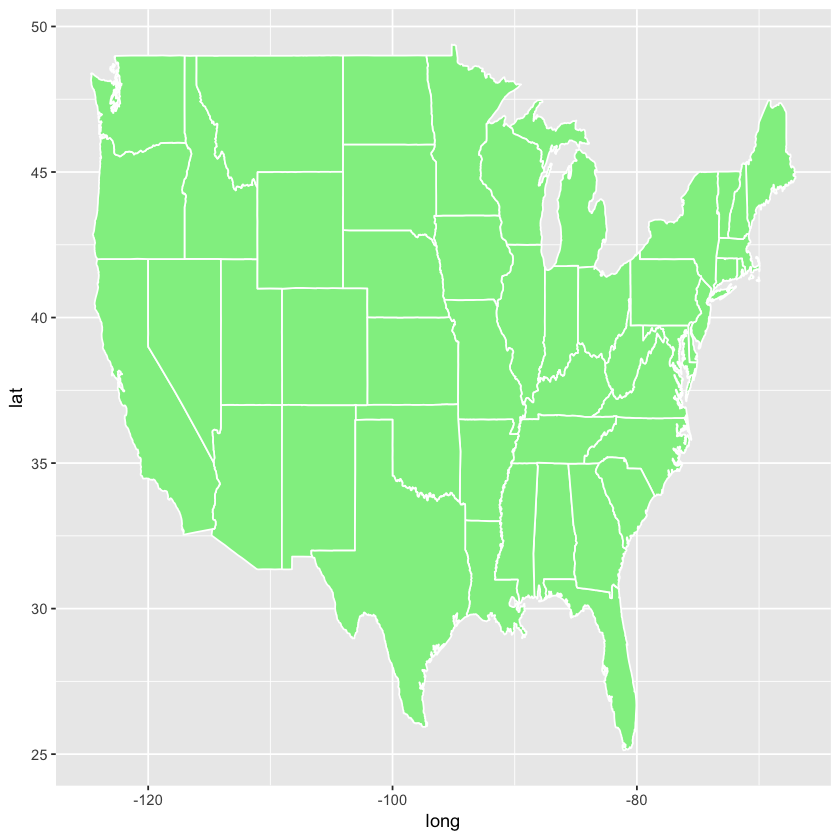

In [13]:
us<-map_data("state")
ggplot(us, aes(x = long, y = lat, group = group)) +
     geom_polygon(fill="lightgreen", colour = "white")

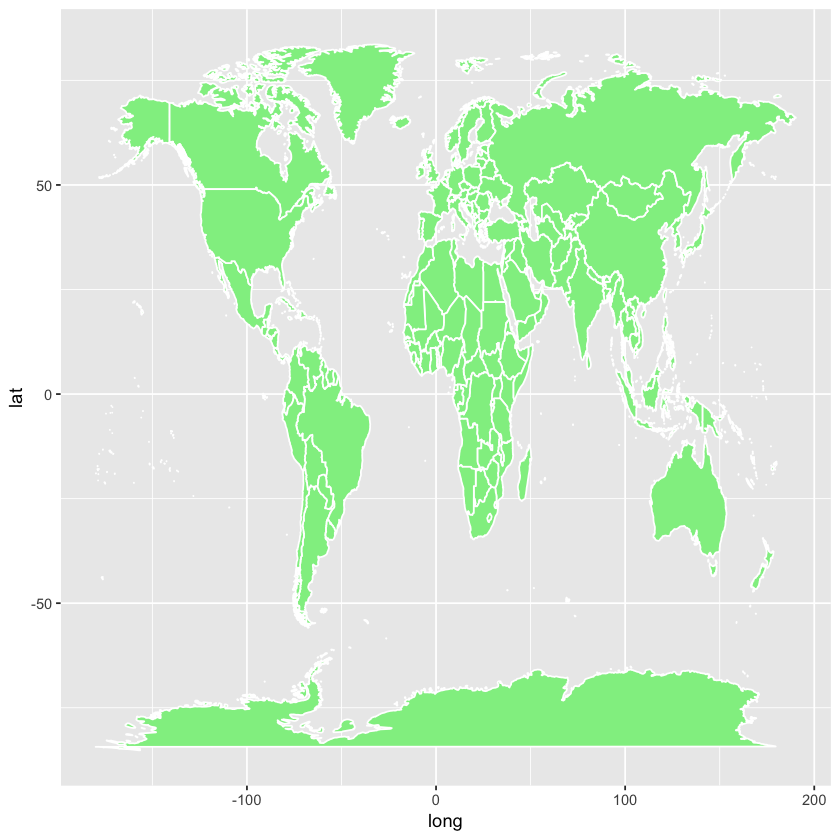

In [14]:
world_map <- map_data("world")
ggplot(world_map, aes(x = long, y = lat, group = group)) +
     geom_polygon(fill="lightgreen", colour = "white")